# Setting up the data

## Imports and dataset

In [1131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from scipy.stats import chi2_contingency

# Levitetään taulukkoa
pd.set_option('display.width', 1000)

# Ladataan datasetti
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')
df.head(10)

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,holidayCabin,gym,muscleCare,healtcare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,NaN,NaN,NaN,1.0
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,NaN,NaN,NaN,1.0
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,NaN,NaN,NaN,1.0
5,6,2,31,2,2.0,14.0,1910,4,4.0,5,2,4,1.0,NaN,NaN,1.0
6,7,1,49,1,2.0,16.0,2066,3,5.0,4,2,2,NaN,1.0,NaN,NaN
7,8,1,55,1,1.0,0.0,2066,3,5.0,3,1,3,NaN,NaN,NaN,1.0
8,9,1,40,2,1.0,23.0,2768,2,4.0,4,2,4,1.0,NaN,NaN,NaN
9,10,1,33,1,1.0,16.0,2106,3,2.0,1,1,1,NaN,NaN,NaN,1.0


In [1132]:
# Tehdään mappaukset myöhempää käyttöä varten
gender_map = {1: 'Male', 2: 'Female'}
family_map = {1: 'Single', 2: 'Not Single'}
edu_map = {1.0: 'Primary school', 2.0: 'Secondary school graduate', 3.0: 'Bachelor', 4.0: 'Master'}
sat_map = {1: 'Very unsatisfied', 2: 'Unsatisfied', 3: 'Neutral', 4: 'Satisfied', 5:'Very Satisfied'}

## Memos

Hakasulkeet [] käsittelee listoja, indexejä ja slicingia
Niillä valitaan ja otetaan käyttään dataa esim. df['age'], Tehdään listat age = [10, 20, 30]

Aalto sulkeilla {} taas mapataan dataa, kuten edu_map ja sat_map


## Basic info of data

In [1133]:
# Katsotaan rivien ja columnien määrä
print("Total rows and columns:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Total rows and columns:
Rows: 82, Columns: 16


In [1134]:
# Katsotaan columnien nimet, monta vastausta, ja data tyyppi
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  holidayCabin            20 non-null     float64
 13  gym                     9 non-null      float64
 14  muscleCare              22 non

In [1135]:
# Tarkistetaan puuttuvat arvot
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
holidayCabin              62
gym                       73
muscleCare                60
healtcare                 35
dtype: int64


In [1136]:
# Katsotaan puuttuvat arvot prosentteina
missing_percentage = ((df.isnull().sum() / len(df)) * 100).round(2)
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
number                     0.00
gender                     0.00
age                        0.00
family                     0.00
education                  1.22
years_of_service           2.44
salary                     0.00
sat_management             0.00
sat_colleques              1.22
sat_workingEnvironment     0.00
sat_salary                 0.00
sat_tasks                  0.00
holidayCabin              75.61
gym                       89.02
muscleCare                73.17
healtcare                 42.68
dtype: float64


In [1137]:
# Katsotaan onko duplikaatteja
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


## Removing columns and renaming

In [1138]:
# Poistetaan columnit
df_removed = df.drop(columns=['number', 'holidayCabin', 'gym', 'muscleCare','healtcare'])
df_removed.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [1139]:
# Nimetään columnit uudelleen
df_removed.columns = ['gender', 'age', 'family', 'education', 'years of service', 'salary', 'satisfaction with management', 'satisfaction with colleques', 'satisfaction with working environment', 'satisfaction with salary', 'satisfaction with job tasks']
df_removed.head(10)

,gender,age,family,education,years of service,salary,satisfaction with management,satisfaction with colleques,satisfaction with working environment,satisfaction with salary,satisfaction with job tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2
5,2,31,2,2.0,14.0,1910,4,4.0,5,2,4
6,1,49,1,2.0,16.0,2066,3,5.0,4,2,2
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
8,1,40,2,1.0,23.0,2768,2,4.0,4,2,4
9,1,33,1,1.0,16.0,2106,3,2.0,1,1,1


## Quick examination of the modified data

In [1140]:
# Katsotaan dataa ja pyöristetään 2 desimaaliin
df_removed.describe().round(2)

,gender,age,family,education,years of service,salary,satisfaction with management,satisfaction with colleques,satisfaction with working environment,satisfaction with salary,satisfaction with job tasks
count,82.00,82.00,82.00,81.00,80.00,82.00,82.00,81.00,82.00,82.00,82.00
mean,1.23,37.95,1.62,1.99,12.18,2563.88,3.06,4.06,3.22,2.11,3.20
std,0.42,9.77,0.49,0.84,8.81,849.35,1.06,0.83,1.15,1.11,1.05
min,1.00,20.00,1.00,1.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00
25%,1.00,31.00,1.00,1.00,3.75,2027.00,2.00,4.00,3.00,1.00,3.00
50%,1.00,37.50,2.00,2.00,12.50,2320.00,3.00,4.00,3.00,2.00,3.00
75%,1.00,44.00,2.00,3.00,18.25,2808.00,4.00,5.00,4.00,3.00,4.00
max,2.00,61.00,2.00,4.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00


In [1141]:
df_removed[['age', 'years of service', 'salary']].describe().round(2)


,age,years of service,salary
count,82.00,80.00,82.00
mean,37.95,12.18,2563.88
std,9.77,8.81,849.35
min,20.00,0.00,1521.00
25%,31.00,3.75,2027.00
50%,37.50,12.50,2320.00
75%,44.00,18.25,2808.00
max,61.00,36.00,6278.00


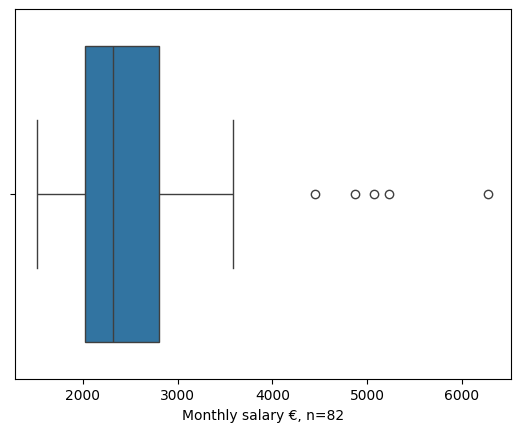

In [1142]:
# Katsotaan miltä boxplotti palkasta näyttää
salaryplot = sns.boxplot(x = df_removed['salary'])
salaryplot.set_xlabel('Monthly salary €, n=' + str(df_removed['salary'].count()));

Sininen laatikko kuvaa keskimmäistä 50% kaikista palkan arvoista. Alaraja on 25:n prosenttipiste ja yläraja 75:n prosenttipiste. Tätä myös kutsutaan interkvartaaliväliksi (IQR)

Laatikon sisällä oleva vaakaviiva on mediaani, eli datan keskimmäinen arvo (50%)

Laatikosta lähtevät viivat näyttävät normaalien arvojen vaihteluvälin, joka on 1,5 x IQR

"n=82" on analysoitujen arvojen lukumäärä

In [1143]:
# Katsotaan montako uniikkia vastausta on kullekkin columnille
unique_counts = df_removed.nunique().to_frame('Unique Count')
unique_counts

,Unique Count
gender,2
age,37
family,2
education,4
years of service,28
salary,42
satisfaction with management,5
satisfaction with colleques,4
satisfaction with working environment,5
satisfaction with salary,5


In [1144]:
# Mennään loopilla datan läpi ja printataan uniikit arvot
for col in df_removed.columns:
    # Tehdään lista ja järjestellään se
    uniques = sorted([str(u) for u in df_removed[col].dropna().unique()])
    # Lasketaan puuttuvat arvot
    missing = df_removed[col].isna().sum()
    # Liitetään uniikit arvot yhteen ja erotellaan pilkulla
    values_str = ', '.join(uniques)
    # Textwrapin avulla printataan siistimpi taulu datasta
    wrapped = textwrap.fill(values_str, width=95, subsequent_indent='    ')
    
    print("=" * 100)
    print(f"Column: {col}")
    print(f"Unique values ({len(uniques)}):")
    print(f"    {wrapped}")
    print(f"Missing values: {missing}")
print("=" * 100)

Column: gender
Unique values (2):
    1, 2
Missing values: 0
Column: age
Unique values (37):
    20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
    45, 46, 47, 49, 50, 51, 52, 53, 55, 56, 58, 59, 61
Missing values: 0
Column: family
Unique values (2):
    1, 2
Missing values: 0
Column: education
Unique values (4):
    1.0, 2.0, 3.0, 4.0
Missing values: 1
Column: years of service
Unique values (28):
    0.0, 1.0, 10.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 2.0, 20.0, 21.0, 22.0, 23.0,
    24.0, 27.0, 28.0, 3.0, 35.0, 36.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0
Missing values: 2
Column: salary
Unique values (42):
    1521, 1559, 1598, 1638, 1715, 1872, 1910, 1949, 1989, 2027, 2066, 2106, 2144, 2183, 2223, 2261,
    2300, 2340, 2417, 2457, 2495, 2534, 2574, 2612, 2651, 2691, 2729, 2768, 2808, 2846, 2925,
    2963, 3119, 3393, 3470, 3510, 3587, 4446, 4874, 5069, 5225, 6278
Missing values: 0
Column: satisfaction with management
Unique values 

# Creating the frequency tables and charts

## Base variables

### Categorical Variables

#### Gender

In [1145]:
# Tehdään dataframe sukupuolelle
df_gender = pd.crosstab(df_removed['gender'].map(gender_map), 'Count')
# Poistetaan indexi
df_gender.index.name = None
# Muutetaan col_0 -> Gender
df_gender.columns.name='Gender'
# .loc luodaan uusi rivi nimeltä Total ja summataan sinne vastauksien määrä
df_gender.loc['Total'] = df_gender['Count'].sum()

df_gender

Gender,Count
Female,19
Male,63
Total,82


In [1146]:
# Tehdään dataframe jossa on myös sukupuolten prosentti määrä
df_gender_percentile = pd.crosstab(df_removed['gender'].map(gender_map), 'Count')
# Lasketaan prosentit
df_gender_percentile['%'] = (df_gender_percentile['Count'] / df_gender_percentile['Count'].sum() * 100).round(2)

df_gender_percentile.index.name = None
df_gender_percentile.columns.name='Gender'

df_gender_percentile.loc['Total'] = [df_gender_percentile['Count'].sum(), 100]

df_gender_percentile

Gender,Count,%
Female,19,23.17
Male,63,76.83
Total,82,100.00


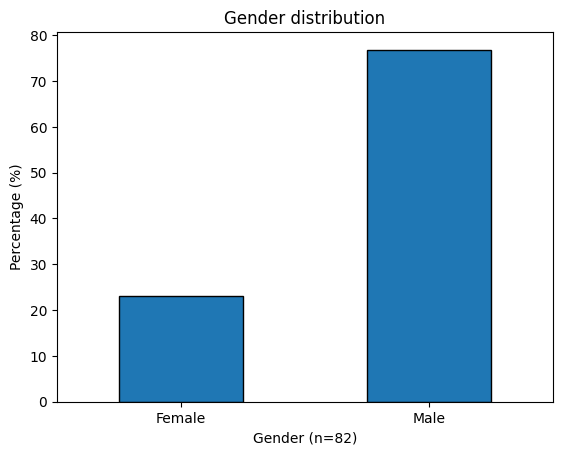

In [1147]:
# Tehdään barchartti sukupuolten jakaumasta
df_gender_plot = df_gender_percentile.loc[df_gender_percentile.index != 'Total']
# Lasketaan vastaajien kokonaismäärä
total_count = df_gender_plot['Count'].sum()
# Lisätään musta reuna bareille
df_gender_plot['%'].plot(kind='bar', edgecolor='black')
# Label y-akselille
plt.ylabel("Percentage (%)")
# Label x-akselille
plt.xlabel(f"Gender (n={total_count})")
# Title
plt.title("Gender distribution")
# Käännetään x-akselin tekstit horisontaaliseksi
plt.xticks(rotation=0);


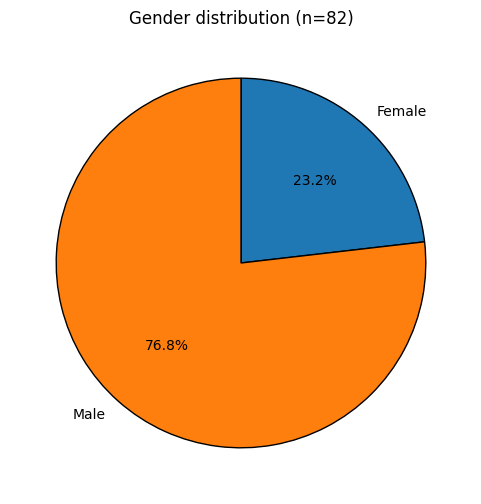

In [1148]:
# Otetaan pois 'Total' rivi
df_gender_plot = df_gender_percentile.loc[df_gender_percentile.index != 'Total']

# Lasketaan vastaajien kokonaismäärä
total_count = df_gender_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
plt.pie(df_gender_plot['Count'], labels=df_gender_plot.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'edgecolor': 'black'})

# Lisätään otsikko
plt.title(f"Gender distribution (n={total_count})");


#### Family

In [1149]:
df_family = pd.crosstab(df_removed['family'].map(family_map), 'Count')

df_family.index.name = None
df_family.columns.name='Status'

df_family.loc['Total'] = df_family['Count'].sum()

df_family

Status,Count
Not Single,51
Single,31
Total,82


In [1150]:
df_family_percentile = pd.crosstab(df_removed['family'].map(family_map), 'Count')
df_family_percentile['%'] = (df_family_percentile['Count'] / df_family_percentile['Count'].sum() * 100).round(2)

df_family_percentile.index.name = None
df_family_percentile.columns.name='Status'

df_family_percentile.loc['Total'] = [df_family_percentile['Count'].sum(), 100]

df_family_percentile

Status,Count,%
Not Single,51,62.2
Single,31,37.8
Total,82,100.0


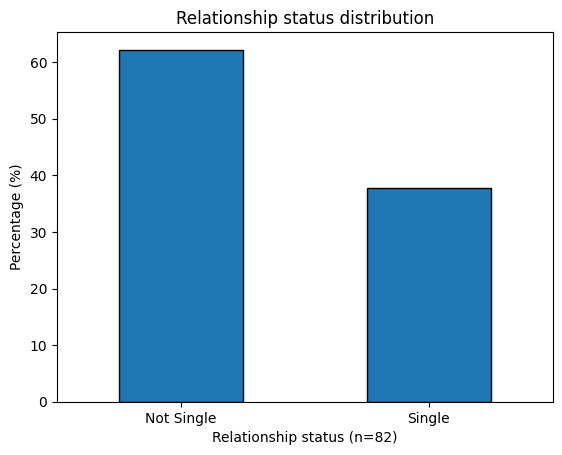

In [1151]:
# Tehdään barchartti sukupuolten jakaumasta
df_family_plot = df_family_percentile.loc[df_family_percentile.index != 'Total']
# Lasketaan vastaajien kokonaismäärä
total_count = df_family_plot['Count'].sum()
# Lisätään musta reuna bareille
df_family_plot['%'].plot(kind='bar', edgecolor='black')
# Label y-akselille
plt.ylabel("Percentage (%)")
# Label x-akselille
plt.xlabel(f"Relationship status (n={total_count})")
# Title
plt.title("Relationship status distribution")
# Käännetään x-akselin tekstit horisontaaliseksi
plt.xticks(rotation=0);

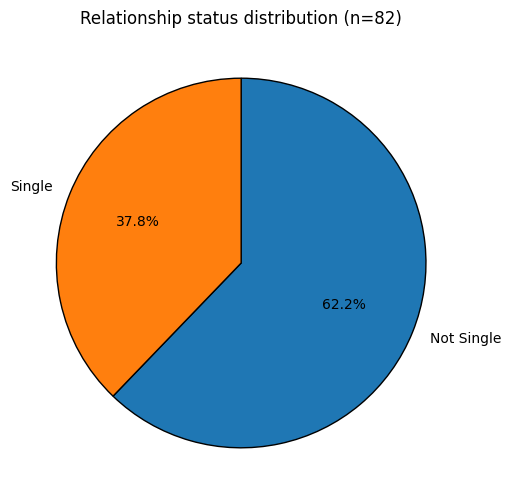

In [1152]:
# Ei oteta 'Total' riviä mukaan
df_family_plot = df_family_percentile.loc[df_family_percentile.index != 'Total']

# Lasketaan vastaajien kokonaismäärä
total_count = df_family_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
plt.pie(df_family_plot['Count'], labels=df_family_plot.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'edgecolor': 'black'})

# Lisätään otsikko
plt.title(f"Relationship status distribution (n={total_count})");


#### Education

In [1153]:
# Tehdään koulutus dataframe, ja mapataan numerot tutkinto tasoihin
df_edu = pd.crosstab(df_removed['education'].map(edu_map), 'Count')

df_edu.index.name = None
df_edu.columns.name='Degree'
# Muutetaan järjestys suurimmasta pienimpään
edu_order = ['Master', 'Bachelor', 'Secondary school graduate', 'Primary school']
df_edu = df_edu.reindex(edu_order)

df_edu.loc['Total'] = df_edu['Count'].sum()

df_edu

Degree,Count
Master,2
Bachelor,22
Secondary school graduate,30
Primary school,27
Total,81


In [1154]:
df_edu_percentile = pd.crosstab(df_removed['education'].map(edu_map), 'Count')
df_edu_percentile['%'] = (df_edu_percentile['Count'] / df_edu_percentile['Count'].sum() * 100).round(2)

df_edu_percentile.index.name = None
df_edu_percentile.columns.name='Degree'

df_edu_percentile = df_edu_percentile.reindex(edu_order)

df_edu_percentile.loc['Total'] = [df_edu_percentile['Count'].sum(), 100]

df_edu_percentile

Degree,Count,%
Master,2,2.47
Bachelor,22,27.16
Secondary school graduate,30,37.04
Primary school,27,33.33
Total,81,100.00


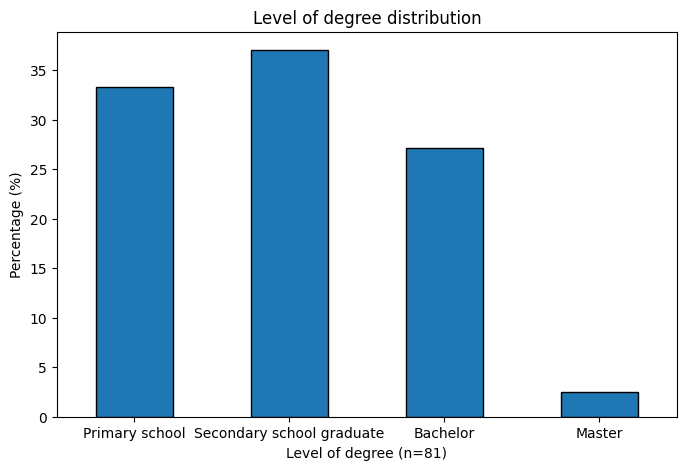

In [1155]:
# Tehdään barchartti tutkinto tasojen jakaumasta ja käännetään järjestys graafia varten
df_edu_plot = df_edu_percentile.loc[df_edu_percentile.index != 'Total'].iloc[::-1]
# Lasketaan vastaajien kokonaismäärä
total_count = df_edu_plot['Count'].sum()
# Kasvatetaan graphin kokoa
plt.figure(figsize=(8,5))
# Luodaan graphi ja lisätään musta reuna bareille
df_edu_plot['%'].plot(kind='bar', edgecolor='black')
# Label y-akselille
plt.ylabel("Percentage (%)")
# Label x-akselille
plt.xlabel(f"Level of degree (n={total_count})")
# Title
plt.title("Level of degree distribution")
# Käännetään x-akselin tekstit horisontaaliseksi
plt.xticks(rotation=0);

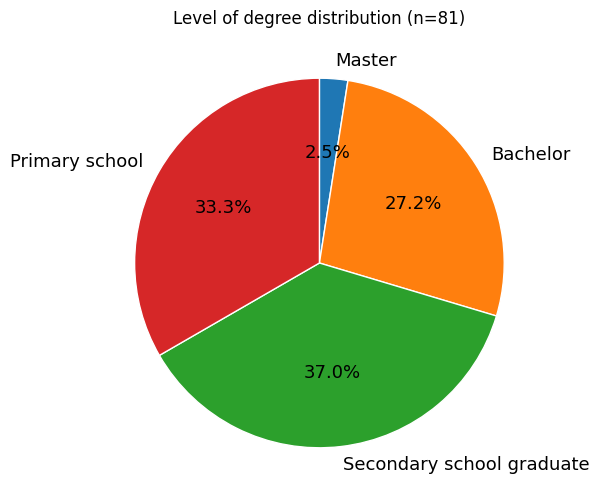

In [1156]:
# Otetaan pois 'Total' rivi
df_edu_plot = df_edu_percentile.loc[df_edu_percentile.index != 'Total']

# Lasketaan vastaajien kokonaismäärä
total_count = df_edu_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
# autopct formatoi prosentit siivujen sisälle, startangella määritetään mistä ensimmäinen siivu alkaa 90 on klo 12, 
plt.pie(df_edu_plot['Count'], labels=df_edu_plot.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize':13})

# Lisätään otsikko
plt.title(f"Level of degree distribution (n={total_count})");


### Numerical Variables

#### Age

In [1157]:
# Katsotaan iän teidot
df_removed['age'].describe().to_frame('Age').round(2)


,Age
count,82.00
mean,37.95
std,9.77
min,20.00
25%,31.00
50%,37.50
75%,44.00
max,61.00


In [1158]:
# Jaetaan iät joukkoihin
age_bins = [19, 35, 45, 55, 65]
# Annataan joukoille nimet
age_labels = ['20-35', '36-45', '46-55', '56-65']
# "Leikataan" iät edällä tehtyjen määritteiden mukaan
age_binned = pd.cut(df_removed['age'], bins=age_bins, labels = age_labels)
# Crosstablella otetaan countti taulukkoon
df_age = pd.crosstab(age_binned, 'Count')

df_age.index.name = None
df_age.columns.name='Age'

df_age.loc['Total'] = df_age['Count'].sum()

df_age

Age,Count
20-35,35
36-45,31
46-55,11
56-65,5
Total,82


In [1159]:
# Lisätään prosentit mukaan
df_age_percentile = pd.crosstab(age_binned, 'Count')
df_age_percentile['%'] = (df_age_percentile['Count'] / df_age_percentile['Count'].sum() * 100).round(2)

df_age_percentile.index.name = None
df_age_percentile.columns.name='Age'

df_age_percentile.loc['Total'] = [df_age_percentile['Count'].sum(), 100]

df_age_percentile

Age,Count,%
20-35,35,42.68
36-45,31,37.80
46-55,11,13.41
56-65,5,6.10
Total,82,100.00


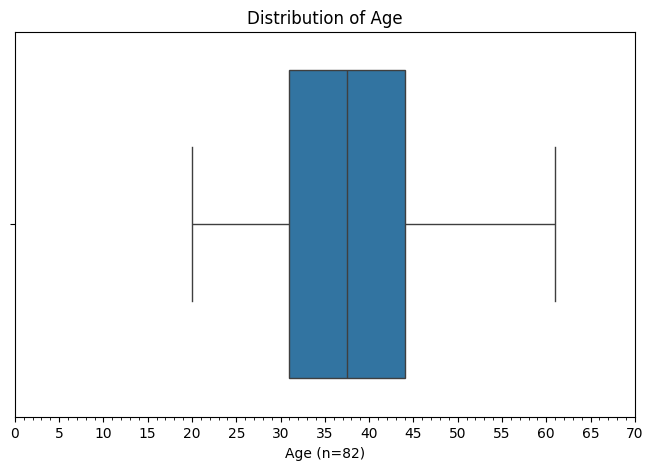

In [1160]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_removed['age'])

# Otetaan vastanneiden määrä
total_count = df_removed['age'].count()

# Lisätään tickit vuosien väliin
plt.minorticks_on()

# Vaihdetaan tickien väli 5 vuoteen ja raja 0-70
plt.xticks(np.arange(0, 71, 5))

plt.title("Distribution of Age")
plt.xlabel(f"Age (n={total_count})");



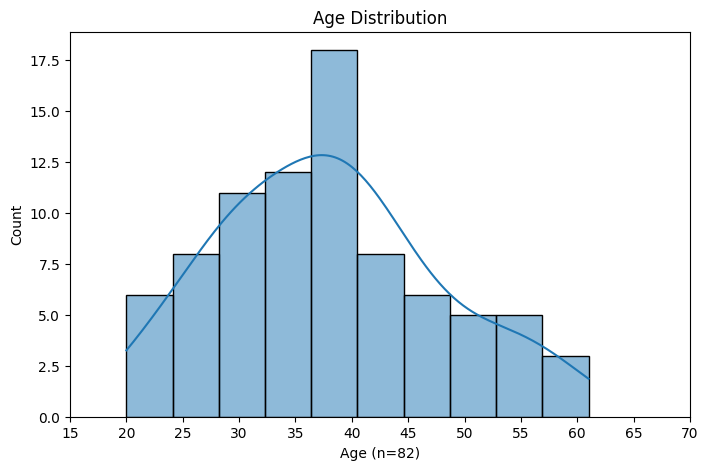

In [1161]:
# Histogrammi ikä jakaumalle
plt.figure(figsize=(8,5))
# binsillä määritellää montako pylvästä, kde=True saadaan piirrettyä arvioitu iän arvioitu käyrä
sns.histplot(df_removed['age'], bins=10, kde=True, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel(f"Age (n={df_removed['age'].count()})")
plt.ylabel("Count")
plt.xticks(np.arange(15, 71, 5));

#### Years of Service

In [1162]:
df_removed['years of service'].describe().to_frame('Years of service').round(2)

,Years of service
count,80.00
mean,12.18
std,8.81
min,0.00
25%,3.75
50%,12.50
75%,18.25
max,36.00


In [1163]:
service_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
service_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40']

service_binned = pd.cut(df_removed['years of service'], bins=service_bins, labels = service_labels, include_lowest = True)

df_service = pd.crosstab(service_binned, 'Count')

df_service.index.name = None
df_service.columns.name='Years'

df_service.loc['Total'] = df_service['Count'].sum()

df_service

Years,Count
0-5,22
6-10,16
11-15,11
16-20,15
21-25,12
26-30,2
31-35,1
36-40,1
Total,80


In [1164]:
df_service_percentile = pd.crosstab(service_binned, 'Count')
df_service_percentile['%'] = df_service_percentile['Count'] / df_service_percentile['Count'].sum() * 100

df_service_percentile.index.name = None
df_service_percentile.columns.name='Years'

df_service_percentile.loc['Total'] = [df_service_percentile['Count'].sum(), 100]

df_service_percentile

Years,Count,%
0-5,22,27.50
6-10,16,20.00
11-15,11,13.75
16-20,15,18.75
21-25,12,15.00
26-30,2,2.50
31-35,1,1.25
36-40,1,1.25
Total,80,100.00


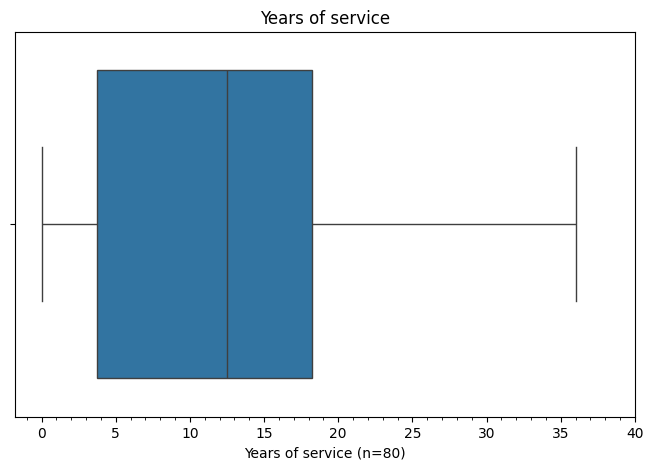

In [1165]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_removed['years of service'])

total_count = df_removed['years of service'].count()

plt.minorticks_on()
plt.xticks(np.arange(0, 41, 5))

plt.title("Years of service")
plt.xlabel(f"Years of service (n={total_count})");

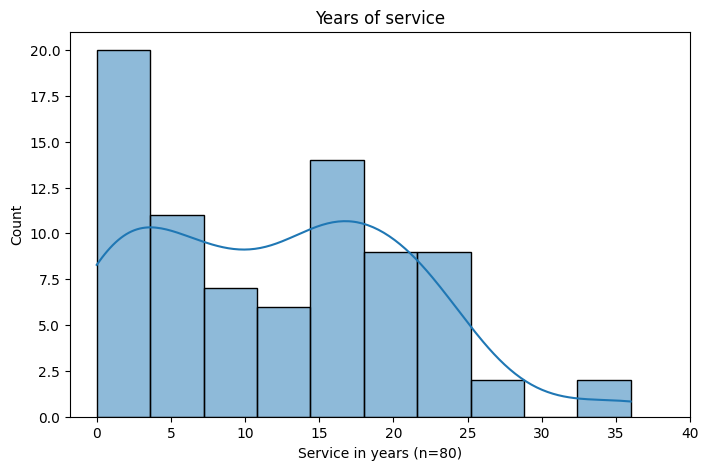

In [1166]:
plt.figure(figsize=(8,5))
# binsillä määritellää montako pylvästä, kde=True saadaan piirrettyä arvioitu iän arvioitu käyrä
sns.histplot(df_removed['years of service'], bins=10, kde=True, edgecolor='black')
plt.title("Years of service")
plt.xlabel(f"Service in years (n={df_removed['years of service'].count()})")
plt.ylabel("Count")
plt.xticks(np.arange(0, 41, 5));


#### Salary

In [1167]:
df_removed['salary'].describe().to_frame('Salary').round(2)

,Salary
count,82.00
mean,2563.88
std,849.35
min,1521.00
25%,2027.00
50%,2320.00
75%,2808.00
max,6278.00


In [1168]:
salary_bins = [1500, 2000, 2500, 3000, 3500, 4000, 6500]
salary_labels = ['1500-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001-6500']

salary_binned = pd.cut(df_removed['salary'], bins=salary_bins, labels = salary_labels)

df_salary = pd.crosstab(salary_binned, 'Count')

df_salary.index.name = None
df_salary.columns.name='Salary €'

df_salary.loc['Total'] = df_salary['Count'].sum()

df_salary

Salary €,Count
1500-2000,19
2001-2500,28
2501-3000,22
3001-3500,4
3501-4000,4
4001-6500,5
Total,82


In [1169]:
df_salary_percentile = pd.crosstab(salary_binned, 'Count')
df_salary_percentile['%'] = (df_salary_percentile['Count'] / df_salary_percentile['Count'].sum() * 100).round(2)

df_salary_percentile.index.name = None
df_salary_percentile.columns.name='Salary €'

df_salary_percentile.loc['Total'] = [df_salary_percentile['Count'].sum(), 100]

df_salary_percentile

Salary €,Count,%
1500-2000,19,23.17
2001-2500,28,34.15
2501-3000,22,26.83
3001-3500,4,4.88
3501-4000,4,4.88
4001-6500,5,6.10
Total,82,100.00


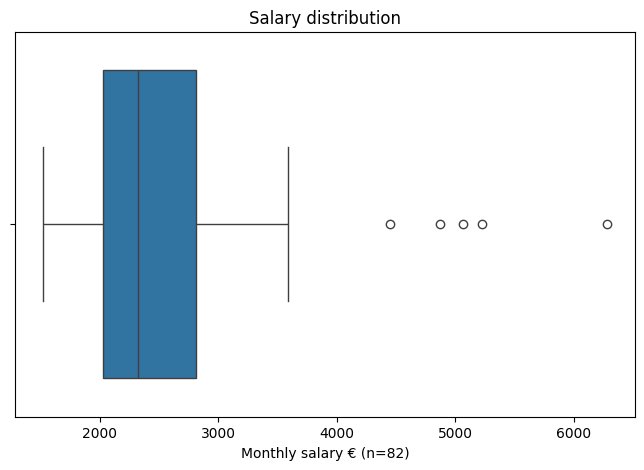

In [1170]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_removed['salary'])

total_count = df_removed['salary'].count()

plt.title("Salary distribution")
plt.xlabel(f"Monthly salary € (n={total_count})");

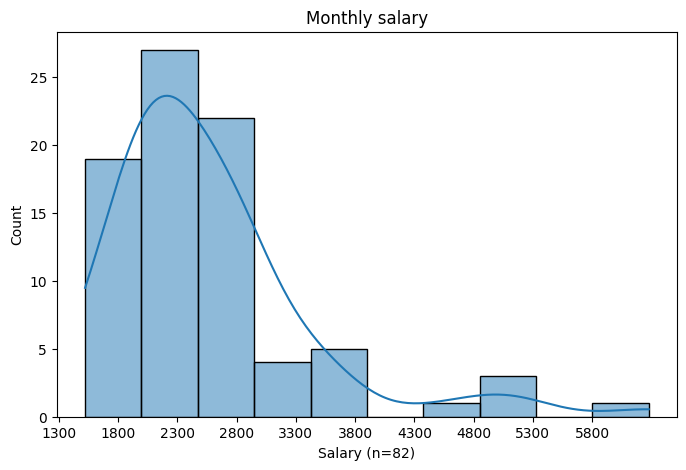

In [1171]:
plt.figure(figsize=(8,5))
# binsillä määritellää montako pylvästä, kde=True saadaan piirrettyä arvioitu iän arvioitu käyrä
sns.histplot(df_removed['salary'], bins=10, kde=True, edgecolor='black')
plt.title("Monthly salary")
plt.xlabel(f"Salary (n={df_removed['salary'].count()})")
plt.ylabel("Count")
plt.xticks(np.arange(1300, 6000, 500));


In [1172]:
print("Skewness:", df_removed['salary'].skew().round(2))
print("Kurtosis:", df_removed['salary'].kurt().round(2))

Skewness: 2.06
Kurtosis: 5.44


Vinous (skewness) kuvaa aineiston jakauman symmetrisyyttä.
Mitä lähempänä arvo on nollaa, sitä symmetrisempi jakauma on.

Positiivinen vinous tarkoittaa, että suurin osa arvoista on keskiarvon alapuolella ja jakaumalla on pitkä oikea häntä.

Negatiivinen vinous taas tarkoittaa, että suurin osa arvoista on keskiarvon yläpuolella ja jakaumalla on pitkä vasen häntä.

Lyhyesti: oikealle vinoilla jakaumilla vinous > 0, ja vasemmalle vinoilla vinous < 0.

Kurtosis (huipukkuus) kuvaa, kuinka tiiviisti havainnot keskittyvät keskiarvon ympärille ja kuinka raskaita tai kevyitä jakauman hännät ovat.

Kun kurtosis > 3, jakauma on leptokurttinen — se tarkoittaa raskaita häntiä ja enemmän äärimmäisiä arvoja.
Kun kurtosis < 3, jakauma on platykurttinen, mikä viittaa kevyempiin häntiin ja vähempiin poikkeaviin arvoihin.

## Sat Variables

#### Satisfaction with management

In [1173]:
df_sat_man = pd.crosstab(df_removed['satisfaction with management'].map(sat_map), 'Count')

df_sat_man_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_man = df_sat_man.reindex(df_sat_man_order)

df_sat_man.index.name = None
df_sat_man.columns.name='Satisfaction'

df_sat_man.loc['Total'] = df_sat_man['Count'].sum()
df_sat_man

Satisfaction,Count
Very unsatisfied,7
Unsatisfied,16
Neutral,30
Satisfied,23
Very Satisfied,6
Total,82


In [1174]:
df_sat_man_percentile = pd.crosstab(df_removed['satisfaction with management'].map(sat_map), 'Count')
df_sat_man_percentile['%'] = (df_sat_man_percentile['Count'] / df_sat_man_percentile['Count'].sum() * 100).round(2)

df_sat_man_percentile.index.name = None
df_sat_man_percentile.columns.name='Satisfaction'

df_sat_man_percentile_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_man_percentile = df_sat_man_percentile.reindex(df_sat_man_percentile_order)

df_sat_man_percentile.loc['Total'] = [df_sat_man_percentile['Count'].sum(), 100]

df_sat_man_percentile

Satisfaction,Count,%
Very unsatisfied,7,8.54
Unsatisfied,16,19.51
Neutral,30,36.59
Satisfied,23,28.05
Very Satisfied,6,7.32
Total,82,100.00


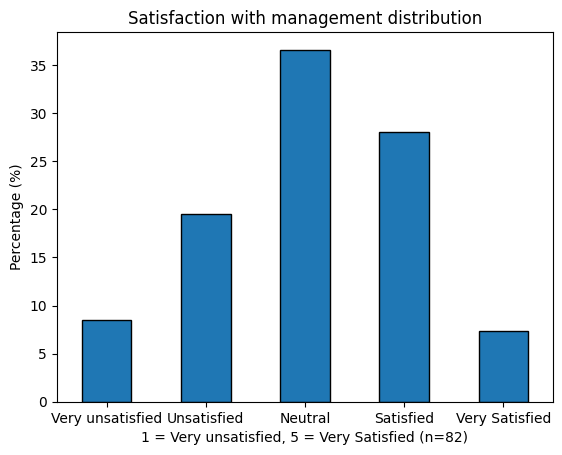

In [1175]:
df_sat_man_plot = df_sat_man_percentile.loc[df_sat_man_percentile.index != 'Total']

total_count = df_sat_man_plot['Count'].sum()

df_sat_man_plot['%'].plot(kind='bar', edgecolor='black')

plt.ylabel("Percentage (%)")
plt.xlabel(f"1 = Very unsatisfied, 5 = Very Satisfied (n={total_count})")
plt.title("Satisfaction with management distribution")
plt.xticks(rotation=0);

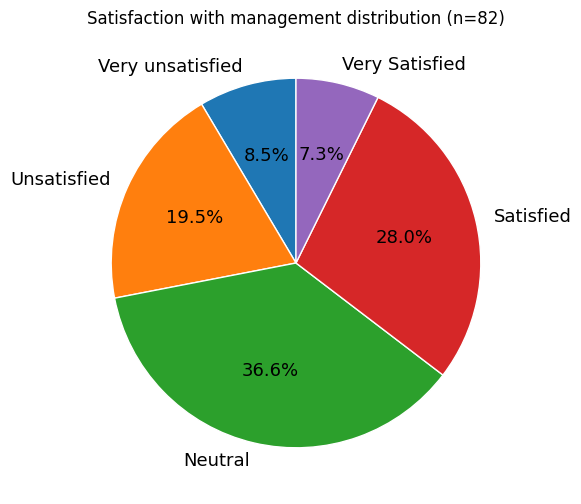

In [1176]:
# Otetaan pois 'Total' rivi
df_sat_man_plot = df_sat_man_percentile.loc[df_sat_man_percentile.index != 'Total']

# Lasketaan vastaajien kokonaismäärä
total_count = df_sat_man_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
# autopct formatoi prosentit siivujen sisälle, startangella määritetään mistä ensimmäinen siivu alkaa 90 on klo 12, 
plt.pie(df_sat_man_plot['Count'], labels=df_sat_man_plot.index, autopct='%1.1f%%', startangle=90, counterclock=True, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize':13})
# Lisätään otsikko
plt.title(f"Satisfaction with management distribution (n={total_count})");


#### Satisfaction with collegues

In [1177]:
df_sat_col = pd.crosstab(df_removed['satisfaction with colleques'].map(sat_map), 'Count')

df_sat_col_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_col = df_sat_col.reindex(df_sat_col_order)
# Vaihdetaan NaN -> 0
df_sat_col['Count'] = df_sat_col['Count'].fillna(0).astype(int)

df_sat_col.index.name = None
df_sat_col.columns.name='Satisfaction'

df_sat_col.loc['Total'] = df_sat_col['Count'].sum()
df_sat_col

Satisfaction,Count
Very unsatisfied,0
Unsatisfied,3
Neutral,16
Satisfied,35
Very Satisfied,27
Total,81


In [1178]:
df_sat_col_percentile = pd.crosstab(df_removed['satisfaction with colleques'].map(sat_map), 'Count')

df_sat_col_percentile_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_col_percentile = df_sat_col_percentile.reindex(df_sat_col_percentile_order)
# Vaihdetaan NaN -> 0
df_sat_col_percentile['Count'] = df_sat_col_percentile['Count'].fillna(0).astype(int)
df_sat_col_percentile['%'] = (df_sat_col_percentile['Count'] / df_sat_col_percentile['Count'].sum() * 100).round(2)

df_sat_col_percentile.index.name = None
df_sat_col_percentile.columns.name='Satisfaction'

df_sat_col_percentile.loc['Total'] = [df_sat_col_percentile['Count'].sum(), 100]

df_sat_col_percentile

Satisfaction,Count,%
Very unsatisfied,0,0.00
Unsatisfied,3,3.70
Neutral,16,19.75
Satisfied,35,43.21
Very Satisfied,27,33.33
Total,81,100.00


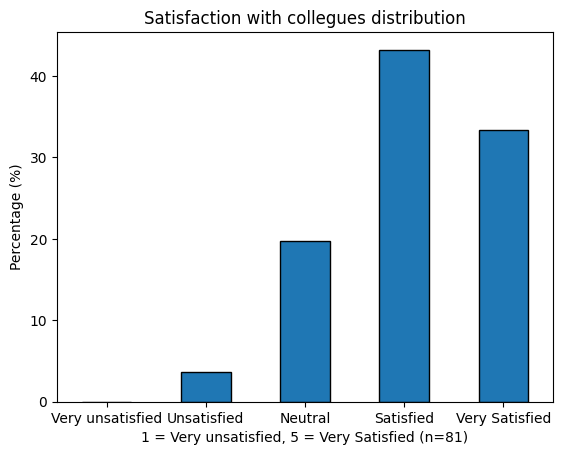

In [1179]:
df_sat_col_plot = df_sat_col_percentile.loc[df_sat_col_percentile.index != 'Total']

total_count = df_sat_col_plot['Count'].sum()

df_sat_col_plot['%'].plot(kind='bar', edgecolor='black')

plt.ylabel("Percentage (%)")
plt.xlabel(f"1 = Very unsatisfied, 5 = Very Satisfied (n={total_count})")
plt.title("Satisfaction with collegues distribution")
plt.xticks(rotation=0);

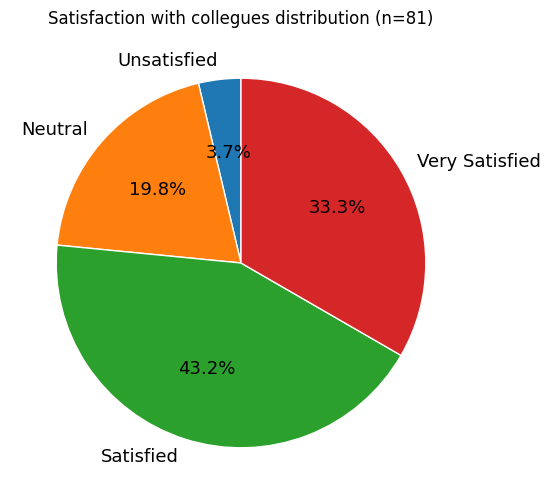

In [1180]:
# Otetaan pois 'Total' rivi
df_sat_col_plot = df_sat_col_percentile.loc[df_sat_col_percentile.index != 'Total']

df_sat_col_plot = df_sat_col_plot[df_sat_col_plot['Count'] > 0]

# Lasketaan vastaajien kokonaismäärä
total_count = df_sat_col_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
# autopct formatoi prosentit siivujen sisälle, startangella määritetään mistä ensimmäinen siivu alkaa 90 on klo 12, 
plt.pie(df_sat_col_plot['Count'], labels=df_sat_col_plot.index, autopct='%1.1f%%', startangle=90, counterclock=True, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize':13})
# Lisätään otsikko
plt.title(f"Satisfaction with collegues distribution (n={total_count})");


#### Satisfaction with working environment

In [1181]:
df_sat_env = pd.crosstab(df_removed['satisfaction with working environment'].map(sat_map), 'Count')

df_sat_env_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_env = df_sat_env.reindex(df_sat_env_order)

df_sat_env.index.name = None
df_sat_env.columns.name='Satisfaction'

df_sat_env.loc['Total'] = df_sat_env['Count'].sum()
df_sat_env

Satisfaction,Count
Very unsatisfied,9
Unsatisfied,9
Neutral,30
Satisfied,23
Very Satisfied,11
Total,82


In [1182]:
df_sat_env_percentile = pd.crosstab(df_removed['satisfaction with working environment'].map(sat_map), 'Count')
df_sat_env_percentile['%'] = (df_sat_env_percentile['Count'] / df_sat_env_percentile['Count'].sum() * 100).round(2)

df_sat_env_percentile.index.name = None
df_sat_env_percentile.columns.name='Satisfaction'

df_sat_env_percentile_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_env_percentile = df_sat_env_percentile.reindex(df_sat_env_percentile_order)

df_sat_env_percentile.loc['Total'] = [df_sat_env_percentile['Count'].sum(), 100]

df_sat_env_percentile

Satisfaction,Count,%
Very unsatisfied,9,10.98
Unsatisfied,9,10.98
Neutral,30,36.59
Satisfied,23,28.05
Very Satisfied,11,13.41
Total,82,100.00


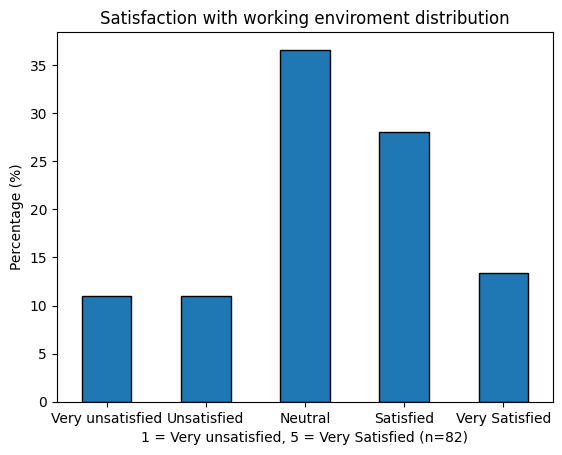

In [1183]:
df_sat_env_plot = df_sat_env_percentile.loc[df_sat_env_percentile.index != 'Total']

total_count = df_sat_env_plot['Count'].sum()

df_sat_env_plot['%'].plot(kind='bar', edgecolor='black')

plt.ylabel("Percentage (%)")
plt.xlabel(f"1 = Very unsatisfied, 5 = Very Satisfied (n={total_count})")
plt.title("Satisfaction with working enviroment distribution")
plt.xticks(rotation=0);

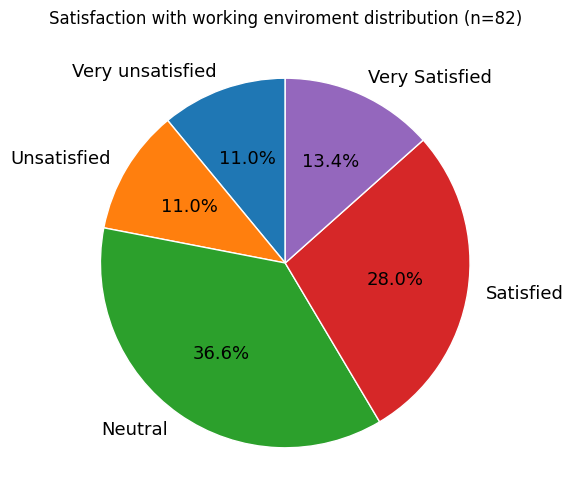

In [1184]:
# Otetaan pois 'Total' rivi
df_sat_env_plot = df_sat_env_percentile.loc[df_sat_env_percentile.index != 'Total']

# Lasketaan vastaajien kokonaismäärä
total_count = df_sat_env_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
# autopct formatoi prosentit siivujen sisälle, startangella määritetään mistä ensimmäinen siivu alkaa 90 on klo 12, 
plt.pie(df_sat_env_plot['Count'], labels=df_sat_env_plot.index, autopct='%1.1f%%', startangle=90, counterclock=True, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize':13})
# Lisätään otsikko
plt.title(f"Satisfaction with working enviroment distribution (n={total_count})");


#### Satisfaction with salary

In [1185]:
df_sat_sal = pd.crosstab(df_removed['satisfaction with salary'].map(sat_map), 'Count')

df_sat_sal_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_sal = df_sat_sal.reindex(df_sat_sal_order)

df_sat_sal.index.name = None
df_sat_sal.columns.name='Satisfaction'

df_sat_sal.loc['Total'] = df_sat_sal['Count'].sum()
df_sat_sal

Satisfaction,Count
Very unsatisfied,33
Unsatisfied,19
Neutral,19
Satisfied,10
Very Satisfied,1
Total,82


In [1186]:
df_sat_sal_percentile = pd.crosstab(df_removed['satisfaction with salary'].map(sat_map), 'Count')

df_sat_sal_percentile['%'] = (df_sat_sal_percentile['Count'] / df_sat_sal_percentile['Count'].sum() * 100).round(2)

df_sat_sal_percentile.index.name = None
df_sat_sal_percentile.columns.name='Satisfaction'

df_sat_sal_percentile_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_sal_percentile = df_sat_sal_percentile.reindex(df_sat_sal_percentile_order)

df_sat_sal_percentile.loc['Total'] = [df_sat_sal_percentile['Count'].sum(), 100]

df_sat_sal_percentile

Satisfaction,Count,%
Very unsatisfied,33,40.24
Unsatisfied,19,23.17
Neutral,19,23.17
Satisfied,10,12.20
Very Satisfied,1,1.22
Total,82,100.00


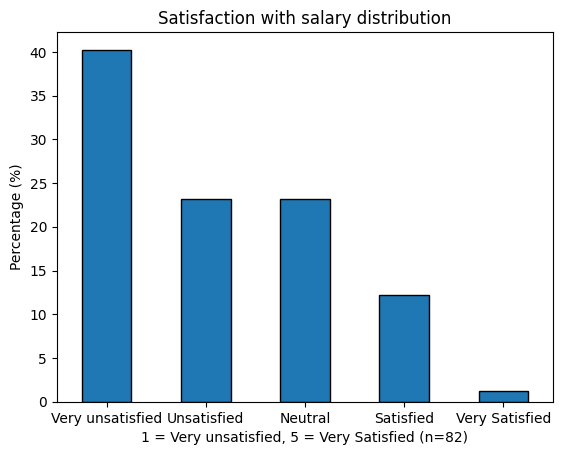

In [1187]:
df_sat_sal_plot = df_sat_sal_percentile.loc[df_sat_sal_percentile.index != 'Total']

total_count = df_sat_sal_plot['Count'].sum()

df_sat_sal_plot['%'].plot(kind='bar', edgecolor='black')

plt.ylabel("Percentage (%)")
plt.xlabel(f"1 = Very unsatisfied, 5 = Very Satisfied (n={total_count})")
plt.title("Satisfaction with salary distribution")
plt.xticks(rotation=0);

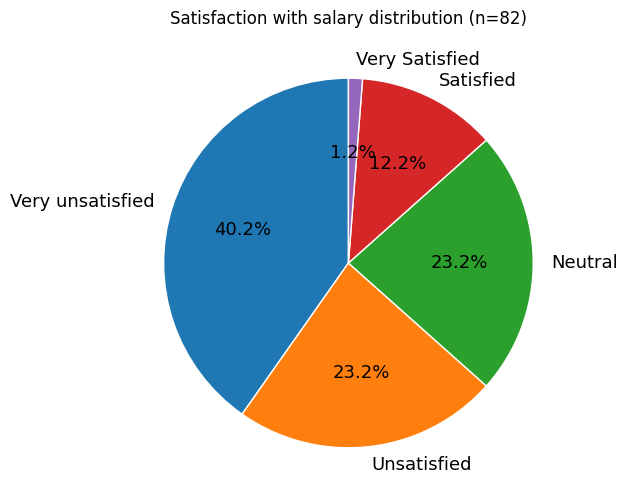

In [1188]:
# Ei oteta mukaan 'Total' riviä
df_sat_sal_plot = df_sat_sal_percentile.loc[df_sat_sal_percentile.index != 'Total']

# Lasketaan vastaajien kokonaismäärä
total_count = df_sat_sal_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
# autopct formatoi prosentit siivujen sisälle, startangella määritetään mistä ensimmäinen siivu alkaa 90 on klo 12, 
plt.pie(df_sat_sal_plot['Count'], labels=df_sat_sal_plot.index, autopct='%1.1f%%', startangle=90, counterclock=True, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize':13})
# Lisätään otsikko
plt.title(f"Satisfaction with salary distribution (n={total_count})");


#### Satisfaction with job tasks

In [1189]:
df_sat_job = pd.crosstab(df_removed['satisfaction with job tasks'].map(sat_map), 'Count')

df_sat_job_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_job = df_sat_job.reindex(df_sat_job_order)

df_sat_job.index.name = None
df_sat_job.columns.name='Satisfaction'

df_sat_job.loc['Total'] = df_sat_job['Count'].sum()
df_sat_job

Satisfaction,Count
Very unsatisfied,5
Unsatisfied,15
Neutral,29
Satisfied,25
Very Satisfied,8
Total,82


In [1190]:
df_sat_job_percentile = pd.crosstab(df_removed['satisfaction with job tasks'].map(sat_map), 'Count')
df_sat_job_percentile['%'] = (df_sat_job_percentile['Count'] / df_sat_job_percentile['Count'].sum() * 100).round(2)

df_sat_job_percentile.index.name = None
df_sat_job_percentile.columns.name='Satisfaction'

df_sat_job_percentile_order = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df_sat_job_percentile = df_sat_job_percentile.reindex(df_sat_job_percentile_order)

df_sat_job_percentile.loc['Total'] = [df_sat_job_percentile['Count'].sum(), 100]

df_sat_job_percentile

Satisfaction,Count,%
Very unsatisfied,5,6.10
Unsatisfied,15,18.29
Neutral,29,35.37
Satisfied,25,30.49
Very Satisfied,8,9.76
Total,82,100.00


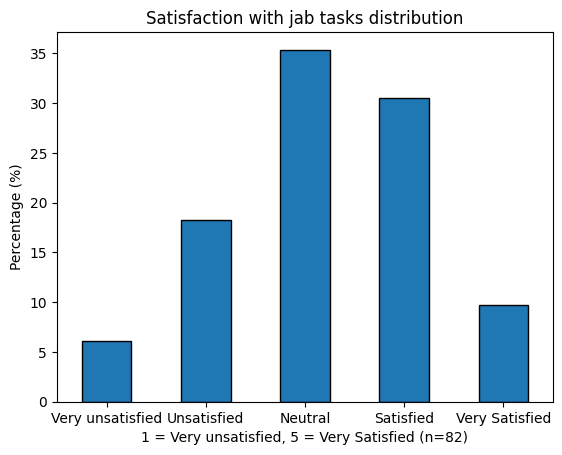

In [1191]:
df_sat_job_plot = df_sat_job_percentile.loc[df_sat_job_percentile.index != 'Total']

total_count = df_sat_job_plot['Count'].sum()

df_sat_job_plot['%'].plot(kind='bar', edgecolor='black')

plt.ylabel("Percentage (%)")
plt.xlabel(f"1 = Very unsatisfied, 5 = Very Satisfied (n={total_count})")
plt.title("Satisfaction with jab tasks distribution")
plt.xticks(rotation=0);

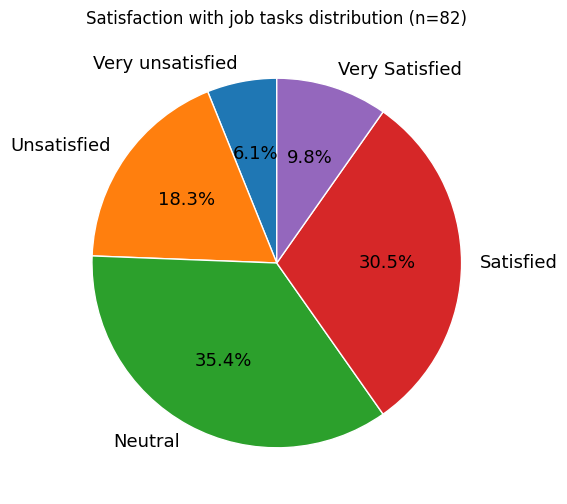

In [1192]:
# Otetaan pois 'Total' rivi
df_sat_job_plot = df_sat_job_percentile.loc[df_sat_job_percentile.index != 'Total']

# Lasketaan vastaajien kokonaismäärä
total_count = df_sat_job_plot['Count'].sum()

# Tehdään piirakkakaavio
plt.figure(figsize=(6,6))
# autopct formatoi prosentit siivujen sisälle, startangella määritetään mistä ensimmäinen siivu alkaa 90 on klo 12, 
plt.pie(df_sat_job_plot['Count'], labels=df_sat_job_plot.index, autopct='%1.1f%%', startangle=90, counterclock=True, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize':13})
# Lisätään otsikko
plt.title(f"Satisfaction with job tasks distribution (n={total_count})");


# Analyzing variables in pairs

## My datapair

Minulla on "Satisfaction with colleques" ja "Age"

### Categorial variable

Luokka muuttuja on "Satisfaction with colleques"

Tyyppi on Ordinaalinen eli voidaan järjestellä hierarkisesti huonosta hyvään

Kertoo vastaajien tyytyväisyydestä työtovereihin

Skaalan merkitys

    1 = Very unsatisfied (Erittäin tyytymätön)
    2 = Unsatisfied (Tyytymätön)
    3 = Neutral (Ei mielipidettä/neutraali)
    4 = Satisfied (Tyytyväinen)
    5 = Very satisfied (Erittäin tyytyväinen)

In [1193]:
df_removed['satisfaction with colleques'].info()
df_removed['satisfaction with colleques'].describe().round(2).to_frame()

<class 'pandas.core.series.Series'>
RangeIndex: 82 entries, 0 to 81
Series name: satisfaction with colleques
Non-Null Count  Dtype  
--------------  -----  
81 non-null     float64
dtypes: float64(1)
memory usage: 788.0 bytes


,satisfaction with colleques
count,81.00
mean,4.06
std,0.83
min,2.00
25%,4.00
50%,4.00
75%,5.00
max,5.00


Count: Kertoo määrän kuinka monta käytettävää data pistettä on, tässä tapauksessa 81

Mean: Eli keskiarvo, datasta saatujen tietojen perusteella osallistujat ovat tyytyväisiä työtovereihin

Std: Eli keskihajonta, kertoo poikkeamisen keskiarvosta. ~0.83 kertoo että vaihtelua on vähän.

Min/Max: Pienin annettu vastaus on "Tyytymätön" ja suurin on "Erittäin tyytyväinen".

25%/50%/75%: Ovat quartaalit, 4/4/5 perusteella näyttäisi siltä, että suurin osa työntekijöistä on tyytyväisiä tai erittäin tyytyväisiä työtovereihin.

    Saadun datan perusteella näyttäisi siltä, että suurin osa työntekijöistä on tyytyväisiä työtovereihin, ja hyvin harva ei ole tyytyväinen.

In [1194]:
df_sat_col_percentile

Satisfaction,Count,%
Very unsatisfied,0,0.00
Unsatisfied,3,3.70
Neutral,16,19.75
Satisfied,35,43.21
Very Satisfied,27,33.33
Total,81,100.00


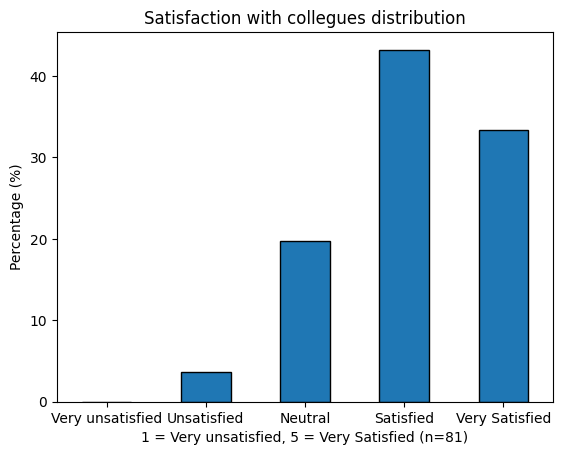

In [1195]:
df_sat_col_plot = df_sat_col_percentile.loc[df_sat_col_percentile.index != 'Total']

total_count = df_sat_col_plot['Count'].sum()

df_sat_col_plot['%'].plot(kind='bar', edgecolor='black')

plt.ylabel("Percentage (%)")
plt.xlabel(f"1 = Very unsatisfied, 5 = Very Satisfied (n={total_count})")
plt.title("Satisfaction with collegues distribution")
plt.xticks(rotation=0);

### Numerical variable

Numeerinen muuttuja on "Age"

    Tyyppi on integeri
    Vaihteluväli on 20-61 vuotta
    Kertoo vastaajien iän vuosissa
    Yleisesti hyödyllinen tieto analyyseissä, helppo verrata ikäluokkia tyytyväisyyteen. (Nuori, keski-ikäinen, Seniori)

In [1196]:
df_removed['age'].info()
df_removed['age'].describe().round(2).to_frame()

<class 'pandas.core.series.Series'>
RangeIndex: 82 entries, 0 to 81
Series name: age
Non-Null Count  Dtype
--------------  -----
82 non-null     int64
dtypes: int64(1)
memory usage: 788.0 bytes


,age
count,82.00
mean,37.95
std,9.77
min,20.00
25%,31.00
50%,37.50
75%,44.00
max,61.00


Count: Kertoo määrän kuinka monta käytettävää data pistettä on, tässä tapauksessa 82

Mean: Eli keskiarvo, datasta saatujen tietojen perusteella osallistujen keski-ikä on ~38 vuotta

Std: Eli keskihajonta, kertoo poikkeamisen keskiarvosta joka on ~10 vuotta. Voisi sanoa, että hajontaa on kohtalaisen paljon.

Min/Max: Pienin ikä on 20 vuotta ja suurin on 61 vuotta.

25%/50%/75%: Ovat quartaalit, noin puolet osallistujista on iältään 31-44 vuotiaita.

    Tästä voidaan päätellä, osallistuja joukko on melko nuoresta keski-ikäisen väliin, kohtalaisella hajonnalla. Suurin osa vastaajista on 30-40 vuoden välillä.

In [1197]:
df_age_percentile

Age,Count,%
20-35,35,42.68
36-45,31,37.80
46-55,11,13.41
56-65,5,6.10
Total,82,100.00


Iät olen jakanut alemmasta päästä 15 vuoden väliin ja muut välit 10 vuoden. Periaatteena junior devaaja, devaaja, senior devaaja, poistuva devaaja, toki ikäluokassa 50 voi olla vielä junior devaaja, mutta ei sitä nyt mietitä

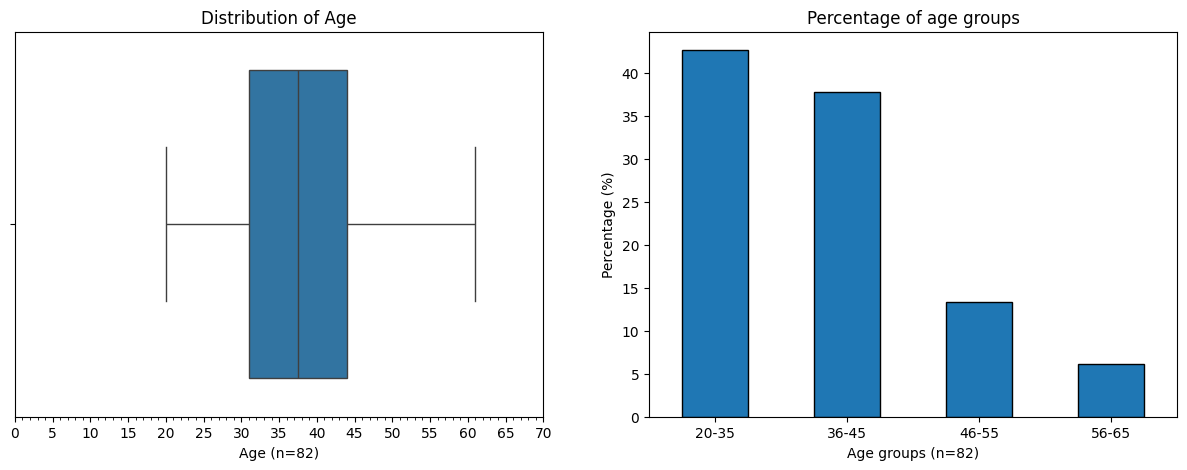

In [1198]:
# Alustetaan data graafien tekoon, ei oteta total saraketta mukaan.
df_percentile = df_age_percentile.loc[df_age_percentile.index != 'Total']
# Tehdään 1 "kuva" kahdella graafilla, käytetään listaa johonka laitetaan plotit, 0 on ikä jakauma, 1 on ikäryhmien prosenttiosuus.
fig, axes = plt.subplots(1, 2, figsize=(15,5))
# Vasemman puoleinen graafi
sns.boxplot(x=df_removed['age'], ax=axes[0])
# Napataan vastanneiden määrä
total_count = df_removed['age'].count()
# Lisätään pienet täpät tarkkuutta lisäämään
axes[0].minorticks_on()
# Muutetaan x akselin väli 0-70 ja vaihdetaan täpät 5 vuoden välein 10 sijaan.
axes[0].set_xticks(np.arange(0, 71, 5))
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel(f"Age (n={total_count})");

# Oikean puoleinen graafi
df_percentile['%'].plot(kind='bar', edgecolor='black')
axes[1].set_title("Percentage of age groups")
axes[1].set_xlabel(f"Age groups (n={total_count})")
# Käännetään ikäryhmien numerot horisontaaliseksi
axes[1].set_xticklabels(df_percentile.index, rotation=0)
axes[1].set_ylabel("Percentage (%)");


### Frequency tables of the datapair

Katsotaan vielä miltä satisfaction with collegues näyttää

Tulee huomioida että kukaan ei ollut vastannus 1 = Very unsatisfied, tämän vuoksi sitä ei näy graafeissa tai taulukoissa.

In [1199]:
df_sat_col

Satisfaction,Count
Very unsatisfied,0
Unsatisfied,3
Neutral,16
Satisfied,35
Very Satisfied,27
Total,81


In [1200]:
# Crosstabi iälle ja tyytyväisyydelle
df_sat_col_age = pd.crosstab(age_binned, df_removed['satisfaction with colleques'], dropna=False)
# Lisätään total countti
df_sat_col_age['Total'] = df_sat_col_age.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_col_age = df_sat_col_age.rename_axis("Age").rename_axis(columns="Satisfaction with colleagues", axis=1)

df_sat_col_age


Satisfaction with colleagues,2.0,3.0,4.0,5.0,Total
Age,,,,,
20-35,1,5,20,9,35
36-45,2,9,9,11,31
46-55,0,2,4,5,11
56-65,0,0,2,2,4


In [1201]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_col_age_percent = df_sat_col_age.div(df_sat_col_age['Total'], axis=0) * 100

df_sat_col_age_percent = df_sat_col_age_percent.round(2)

# Pudotetaan Total sarake
df_sat_col_age_percent = df_sat_col_age_percent.drop(columns='Total')

df_sat_col_age_percent


Satisfaction with colleagues,2.0,3.0,4.0,5.0
Age,,,,
20-35,2.86,14.29,57.14,25.71
36-45,6.45,29.03,29.03,35.48
46-55,0.00,18.18,36.36,45.45
56-65,0.00,0.00,50.00,50.00


### Graphs of the datapair

Tehdään boxplotti dataparista

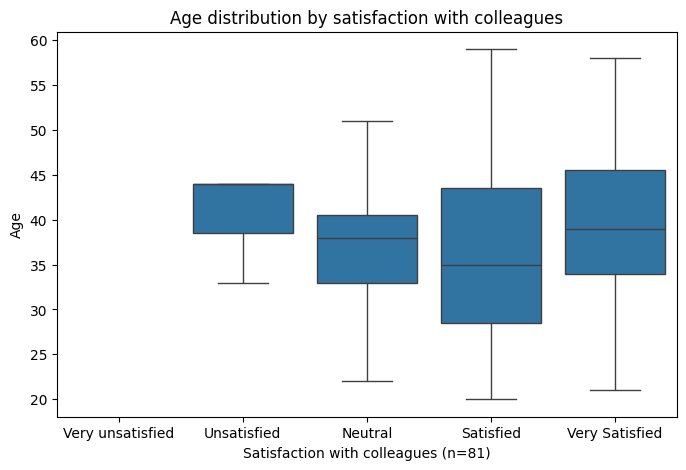

In [1202]:
# Lisätään 1 (erittäin tyytymätön) kuvaajan x akselille, se ei piirry sillä kukaan ei ollut vastannut "Erittäin tyytymätön". Lopuksi järjestellään 1-5.
df_removed['satisfaction with colleques'] = (df_removed['satisfaction with colleques'].astype('category').cat.set_categories([1, 2, 3, 4, 5], ordered=True))

# Kasvatetaan graafin kokoa, jotta tekstit mahtuvat paremmin.
plt.figure(figsize=(8,5))
sns.boxplot(data=df_removed, x='satisfaction with colleques', y='age', order=[1,2,3,4,5])

# Lasketaan vastanneiden määrä
total_count = df_removed['satisfaction with colleques'].count()

# Korvataan numerot tekstillä havainnollistamiseksi
plt.xticks(ticks=[0,1,2,3,4], labels=[sat_map[i] for i in range(1,6)])

# Annetaan x akselille oikea nimi ja "f" alkuun niin saadaan lisättyä total_count(datasetin alussa tullut kirjoitus virhe). Y akselille annetaan nimi, ja lisätään kuvaajan nimi.
plt.xlabel(f"Satisfaction with colleagues (n={total_count})")
plt.ylabel("Age")
# Pistetään ; loppuun niin printata ylimääräisiä.
plt.title("Age distribution by satisfaction with colleagues");


Sininen laatikko kuvaa keskimmäistä 50% kaikista iän arvoista. Alaraja on 25:n prosenttipiste ja yläraja 75:n prosenttipiste. Tätä myös kutsutaan interkvartaaliväliksi (IQR)

Laatikon sisällä oleva vaakaviiva on mediaani, eli datan keskimmäinen arvo (50%)

Laatikosta lähtevät viivat näyttävät normaalien arvojen vaihteluvälin, joka on 1,5 x IQR

"n=81" on analysoitujen arvojen lukumäärä

Tehdään graafi mistä näkee tyytyväisyyden kolleegoihin ikä ryhmittäin

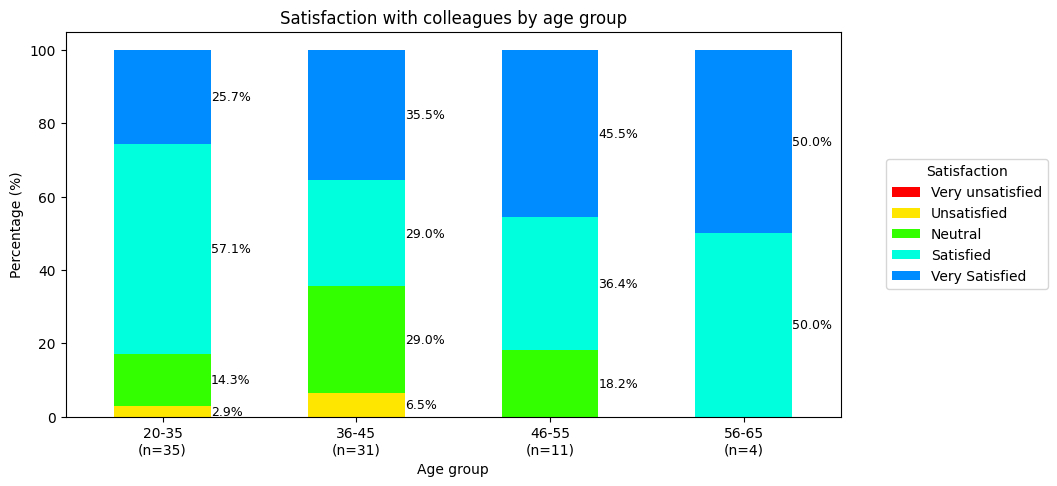

In [1203]:
df_sat_col_age_plot = df_sat_col_age_percent
# Lisätään ensimmäinen (0) indexi, koska kerta siellä ei ole dataa niin se putoaa pois, ja ei näy silloin graafissa
df_sat_col_age_plot = df_sat_col_age_plot.reindex(columns=[1,2,3,4,5], fill_value=0)
# Alustetaan ikäryhmäkohtainen määrä
count_per_group = df_sat_col_age['Total']
# Mapataan ikäryhmäkohtainen määrä graafia varten (n= luku)
age_group_labels = [f"{age}\n(n={int(count_per_group[age])})" for age in df_sat_col_age_percent.index]

# Mapataan värit graafeja varten
colors = ["#FF0000","#FFE600","#33FF00","#00FFDD","#008CFF"]
# Määritellään millainen graafi luodaan, kasataan tässä tapauksessa päällekkäin.
df_sat_col_age_plot.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
plt.xlabel("Age group")
plt.title("Satisfaction with colleagues by age group")
plt.xticks(ticks=range(len(df_sat_col_age_plot.index)), labels=age_group_labels, rotation=0)
plt.legend(title="Satisfaction", labels=[sat_map[i] for i in range(1,6)], bbox_to_anchor=(1.05, 0.5), loc="center left")

# Käydään läpi jokainen ikäryhmä rivi taulukosta
for i, age_group in enumerate(df_sat_col_age_plot.index):
    # Alustetaan muuttuja, joka seuraa segmentin alarajaa pinotussa palkissa
    bottom = 0
    for col in df_sat_col_age_plot.columns:
        # Haetaan käsittelyssä olevan segmentin prosentti osuus
        pct = df_sat_col_age_plot.loc[age_group, col]
        # Lisätään teksti vain jos segmentti on olemassa
        if pct > 0:
            # Lisätään prosentti luku palkin oikealle puolelle, missä x suunta on = i + 0.25 ja y suunta segmentin keskellä on = bottom + pct/2. f"{pct:.1f}%" ottaa prosentin yhden desimaalin tarkkuudella ja lisää % merkin
            #ha='left', va='center' vaakasuuntainen tasaus vasemmalle ja pystysuuntainen keskelle
            plt.gca().text(i + 0.25, bottom + pct/2, f"{pct:.1f}%", ha='left', va='center', fontsize=9)
        # Päivitetään segmentin alaraja seuraava segmenttiä varten
        bottom += pct

### Chi2 - Tests

In [1204]:
# Otetaan tutkittavat kentät ct:he (consistency table)
ct = pd.crosstab(age_binned, df_removed['satisfaction with colleques'])
# Summataan columni kohtaisesti ja !=0 katsotaan että solussa on dataa, muuten epäonnistuu. Voisi toki vaihtaa 0 -> 0.1 joka ei merkitsisi pahemmin.
ct = ct.loc[:, (ct.sum(axis=0) != 0)]
# Ajetaan chi2 eli "kii toiseen", p arvo, dof (degree of freedom), tulisi myös huomioida annetun datan vähyyden, yhdistämällä tyytyväisyydestä 2 ensimmäistä ja 2 viimeistä categoriaa. Tässä sitä en tee, mutta myöhemmin tulee kyllä.
chi2, p, dof, expected = chi2_contingency(ct)
# Tulostetaan tulos
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 8.59, p = 0.476, dof = 9


## Comparing my datapair to the other sat variables

### Comparing Age to Sat Variables

#### Age & Satisfaction with management

##### Frequency tables

In [1205]:
# Crosstabi iälle ja tyytyväisyydelle
df_sat_man_age = pd.crosstab(age_binned, df_removed['satisfaction with management'], dropna=False)
# Lisätään total countti
df_sat_man_age['Total'] = df_sat_man_age.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_man_age = df_sat_man_age.rename_axis("Age").rename_axis(columns="Satisfaction with management", axis=1)

df_sat_man_age

Satisfaction with management,1,2,3,4,5,Total
Age,,,,,,
20-35,3,7,14,10,1,35
36-45,4,6,10,8,3,31
46-55,0,2,5,3,1,11
56-65,0,1,1,2,1,5


In [1206]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_man_age_percent = df_sat_man_age.div(df_sat_man_age['Total'], axis=0) * 100

df_sat_man_age_percent = df_sat_man_age_percent.round(2)

# Pudotetaan Total sarake
df_sat_man_age_percent = df_sat_man_age_percent.drop(columns='Total')

df_sat_man_age_percent

Satisfaction with management,1,2,3,4,5
Age,,,,,
20-35,8.57,20.00,40.00,28.57,2.86
36-45,12.90,19.35,32.26,25.81,9.68
46-55,0.00,18.18,45.45,27.27,9.09
56-65,0.00,20.00,20.00,40.00,20.00


##### Graphs

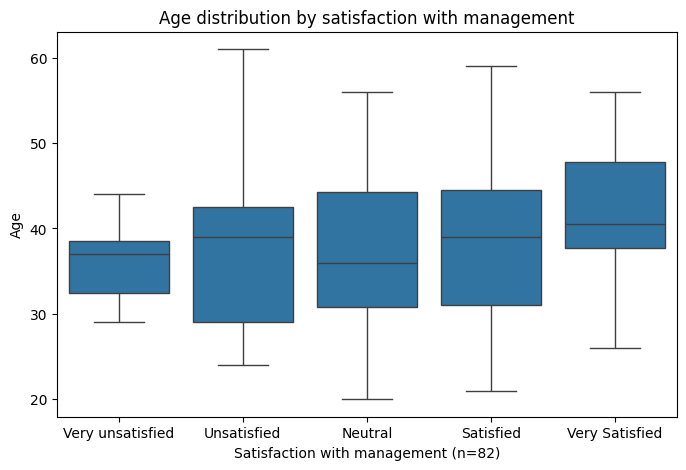

In [1207]:
# Lisätään 1 (erittäin tyytymätön) kuvaajan x akselille, se ei piirry sillä kukaan ei ollut vastannut "Erittäin tyytymätön". Lopuksi järjestellään 1-5.
df_removed['satisfaction with management'] = (df_removed['satisfaction with management'].astype('category').cat.set_categories([1, 2, 3, 4, 5], ordered=True))

# Kasvatetaan graafin kokoa, jotta tekstit mahtuvat paremmin.
plt.figure(figsize=(8,5))
sns.boxplot(data= df_removed, x='satisfaction with management', y='age', order=[1,2,3,4,5])

# Lasketaan vastanneiden määrä
total_count = df_removed['satisfaction with management'].count()

# Korvataan numerot tekstillä havainnollistamiseksi
plt.xticks(ticks=[0,1,2,3,4], labels=[sat_map[i] for i in range(1,6)])

# Annetaan x akselille oikea nimi ja "f" alkuun niin saadaan lisättyä total_count(datasetin alussa tullut kirjoitus virhe). Y akselille annetaan nimi, ja lisätään kuvaajan nimi.
plt.xlabel(f"Satisfaction with management (n={total_count})")
plt.ylabel("Age")
# Pistetään ; loppuun niin printata ylimääräisiä.
plt.title("Age distribution by satisfaction with management");


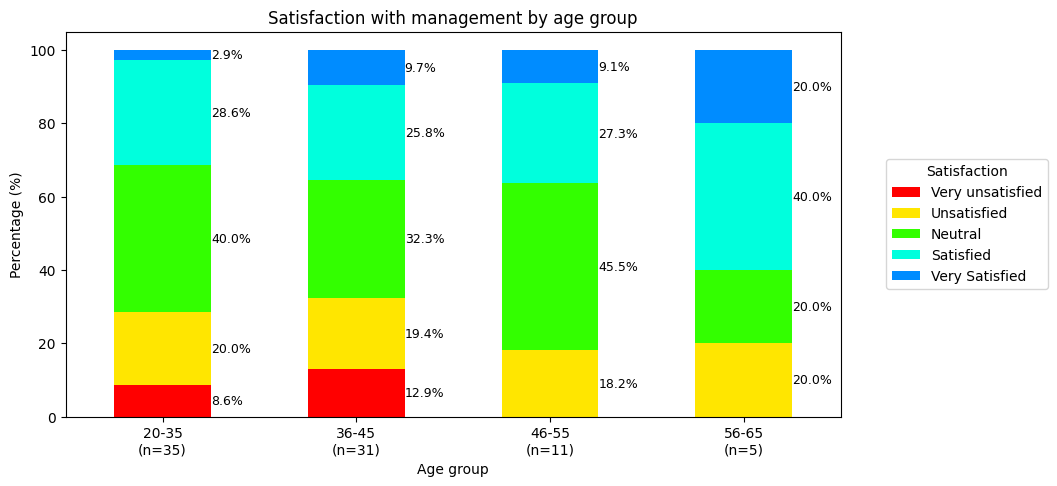

In [1208]:
df_sat_man_age_plot = df_sat_man_age_percent
# Lisätään ensimmäinen (0) indexi, koska kerta siellä ei ole dataa niin se putoaa pois, ja ei näy silloin graafissa
df_sat_man_age_plot = df_sat_man_age_plot.reindex(columns=[1,2,3,4,5], fill_value=0)
# Alustetaan ikäryhmäkohtainen määrä
count_per_group = df_sat_man_age['Total']
# Mapataan ikäryhmäkohtainen määrä graafia varten (n= luku)
age_group_labels = [f"{age}\n(n={int(count_per_group[age])})" for age in df_sat_man_age_percent.index]

# Mapataan värit graafeja varten
colors = ["#FF0000","#FFE600","#33FF00","#00FFDD","#008CFF"]
# Määritellään millainen graafi luodaan, kasataan tässä tapauksessa päällekkäin.
df_sat_man_age_plot.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
plt.xlabel("Age group")
plt.title("Satisfaction with management by age group")
plt.xticks(ticks=range(len(df_sat_man_age_plot.index)), labels=age_group_labels, rotation=0)
plt.legend(title="Satisfaction", labels=[sat_map[i] for i in range(1,6)], bbox_to_anchor=(1.05, 0.5), loc="center left")

# Käydään läpi jokainen ikäryhmä rivi taulukosta
for i, age_group in enumerate(df_sat_man_age_plot.index):
    # Alustetaan muuttuja, joka seuraa segmentin alarajaa pinotussa palkissa
    bottom = 0
    for col in df_sat_man_age_plot.columns:
        # Haetaan käsittelyssä olevan segmentin prosentti osuus
        pct = df_sat_man_age_plot.loc[age_group, col]
        # Lisätään teksti vain jos segmentti on olemassa
        if pct > 0:
            # Lisätään prosentti luku palkin oikealle puolelle, missä x suunta on = i + 0.25 ja y suunta segmentin keskellä on = bottom + pct/2. f"{pct:.1f}%" ottaa prosentin yhden desimaalin tarkkuudella ja lisää % merkin
            #ha='left', va='center' vaakasuuntainen tasaus vasemmalle ja pystysuuntainen keskelle
            plt.gca().text(i + 0.25, bottom + pct/2, f"{pct:.1f}%", ha='left', va='center', fontsize=9)
        # Päivitetään segmentin alaraja seuraava segmenttiä varten
        bottom += pct

##### Chi2

In [1209]:
# Otetaan tutkittavat kentät ct:he (consistency table)
ct = pd.crosstab(age_binned, df_removed['satisfaction with management'])
# Summataan columni kohtaisesti ja !=0 katsotaan että solussa on dataa, muuten epäonnistuu. Voisi toki vaihtaa 0 -> 0.1 joka ei merkitsisi pahemmin.
ct = ct.loc[:, (ct.sum(axis=0) != 0)]
# Ajetaan chi2 eli "kii toiseen", p arvo, dof (degree of freedom) 
chi2, p, dof, expected = chi2_contingency(ct)
# Tulostetaan tulos
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 5.61, p = 0.935, dof = 12


#### Age & Satisfaction with working environment

##### Frequency tables

In [1210]:

# Crosstabi iälle ja tyytyväisyydelle
df_sat_env_age = pd.crosstab(age_binned, df_removed['satisfaction with working environment'], dropna=False)
# Lisätään total countti
df_sat_env_age['Total'] = df_sat_env_age.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_env_age = df_sat_env_age.rename_axis("Age").rename_axis(columns="Satisfaction with working environment", axis=1)

df_sat_env_age

Satisfaction with working environment,1,2,3,4,5,Total
Age,,,,,,
20-35,2,5,16,8,4,35
36-45,7,1,9,10,4,31
46-55,0,2,4,4,1,11
56-65,0,1,1,1,2,5


In [1211]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_env_age_percent = df_sat_env_age.div(df_sat_man_age['Total'], axis=0) * 100

df_sat_env_age_percent = df_sat_env_age_percent.round(2)

# Pudotetaan Total sarake
df_sat_env_age_percent = df_sat_env_age_percent.drop(columns='Total')

df_sat_env_age_percent

Satisfaction with working environment,1,2,3,4,5
Age,,,,,
20-35,5.71,14.29,45.71,22.86,11.43
36-45,22.58,3.23,29.03,32.26,12.90
46-55,0.00,18.18,36.36,36.36,9.09
56-65,0.00,20.00,20.00,20.00,40.00


##### Graphs

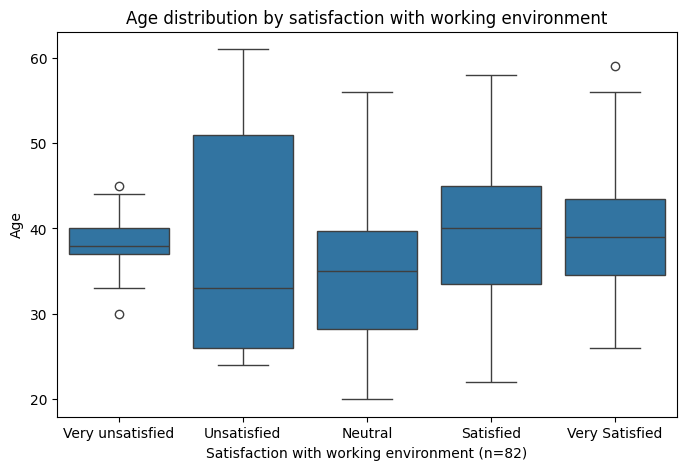

In [1212]:
# Lisätään 1 (erittäin tyytymätön) kuvaajan x akselille, se ei piirry sillä kukaan ei ollut vastannut "Erittäin tyytymätön". Lopuksi järjestellään 1-5.
df_removed['satisfaction with working environment'] = (df_removed['satisfaction with working environment'].astype('category').cat.set_categories([1, 2, 3, 4, 5], ordered=True))

# Kasvatetaan graafin kokoa, jotta tekstit mahtuvat paremmin.
plt.figure(figsize=(8,5))
sns.boxplot(data= df_removed, x='satisfaction with working environment', y='age', order=[1,2,3,4,5])

# Lasketaan vastanneiden määrä
total_count = df_removed['satisfaction with working environment'].count()

# Korvataan numerot tekstillä havainnollistamiseksi
plt.xticks(ticks=[0,1,2,3,4], labels=[sat_map[i] for i in range(1,6)])

# Annetaan x akselille oikea nimi ja "f" alkuun niin saadaan lisättyä total_count(datasetin alussa tullut kirjoitus virhe). Y akselille annetaan nimi, ja lisätään kuvaajan nimi.
plt.xlabel(f"Satisfaction with working environment (n={total_count})")
plt.ylabel("Age")
# Pistetään ; loppuun niin printata ylimääräisiä.
plt.title("Age distribution by satisfaction with working environment");


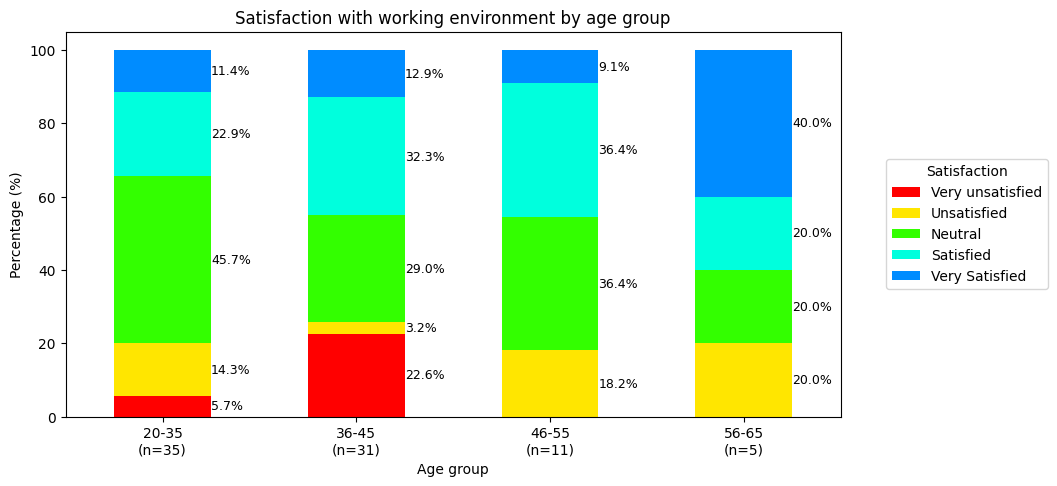

In [1213]:
df_sat_env_age_plot = df_sat_env_age_percent
# Lisätään ensimmäinen (0) indexi, koska kerta siellä ei ole dataa niin se putoaa pois, ja ei näy silloin graafissa
df_sat_env_age_plot = df_sat_env_age_plot.reindex(columns=[1,2,3,4,5], fill_value=0)
# Alustetaan ikäryhmäkohtainen määrä
count_per_group = df_sat_env_age['Total']
# Mapataan ikäryhmäkohtainen määrä graafia varten (n= luku)
age_group_labels = [f"{age}\n(n={int(count_per_group[age])})" for age in df_sat_env_age_percent.index]

# Mapataan värit graafeja varten
colors = ["#FF0000","#FFE600","#33FF00","#00FFDD","#008CFF"]
# Määritellään millainen graafi luodaan, kasataan tässä tapauksessa päällekkäin.
df_sat_env_age_plot.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
plt.xlabel("Age group")
plt.title("Satisfaction with working environment by age group")
plt.xticks(ticks=range(len(df_sat_env_age_plot.index)), labels=age_group_labels, rotation=0)
plt.legend(title="Satisfaction", labels=[sat_map[i] for i in range(1,6)], bbox_to_anchor=(1.05, 0.5), loc="center left")

# Käydään läpi jokainen ikäryhmä rivi taulukosta
for i, age_group in enumerate(df_sat_env_age_plot.index):
    # Alustetaan muuttuja, joka seuraa segmentin alarajaa pinotussa palkissa
    bottom = 0
    for col in df_sat_env_age_plot.columns:
        # Haetaan käsittelyssä olevan segmentin prosentti osuus
        pct = df_sat_env_age_plot.loc[age_group, col]
        # Lisätään teksti vain jos segmentti on olemassa
        if pct > 0:
            # Lisätään prosentti luku palkin oikealle puolelle, missä x suunta on = i + 0.25 ja y suunta segmentin keskellä on = bottom + pct/2. f"{pct:.1f}%" ottaa prosentin yhden desimaalin tarkkuudella ja lisää % merkin
            #ha='left', va='center' vaakasuuntainen tasaus vasemmalle ja pystysuuntainen keskelle
            plt.gca().text(i + 0.25, bottom + pct/2, f"{pct:.1f}%", ha='left', va='center', fontsize=9)
        # Päivitetään segmentin alaraja seuraava segmenttiä varten
        bottom += pct

##### Chi2

In [1214]:
# Otetaan tutkittavat kentät ct:he (consistency table)
ct = pd.crosstab(age_binned, df_removed['satisfaction with working environment'])
# Summataan columni kohtaisesti ja !=0 katsotaan että solussa on dataa, muuten epäonnistuu. Voisi toki vaihtaa 0 -> 0.1 joka ei merkitsisi pahemmin.
ct = ct.loc[:, (ct.sum(axis=0) != 0)]
# Ajetaan chi2 eli "kii toiseen", p arvo, dof (degree of freedom) 
chi2, p, dof, expected = chi2_contingency(ct)
# Tulostetaan tulos
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 14.85, p = 0.250, dof = 12


#### Age & Satisfaction with salary

##### Frequency tables

In [1215]:

# Crosstabi iälle ja tyytyväisyydelle
df_sat_sal_age = pd.crosstab(age_binned, df_removed['satisfaction with salary'], dropna=False)
# Lisätään total countti
df_sat_sal_age['Total'] = df_sat_sal_age.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_sal_age = df_sat_sal_age.rename_axis("Age").rename_axis(columns="Satisfaction with salary", axis=1)

df_sat_sal_age

Satisfaction with salary,1,2,3,4,5,Total
Age,,,,,,
20-35,17,6,10,2,0,35
36-45,11,6,8,6,0,31
46-55,3,6,1,1,0,11
56-65,2,1,0,1,1,5


In [1216]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_sal_age_percent = df_sat_sal_age.div(df_sat_sal_age['Total'], axis=0) * 100

df_sat_sal_age_percent = df_sat_sal_age_percent.round(2)

# Pudotetaan Total sarake
df_sat_sal_age_percent = df_sat_sal_age_percent.drop(columns='Total')

df_sat_sal_age_percent

Satisfaction with salary,1,2,3,4,5
Age,,,,,
20-35,48.57,17.14,28.57,5.71,0.0
36-45,35.48,19.35,25.81,19.35,0.0
46-55,27.27,54.55,9.09,9.09,0.0
56-65,40.00,20.00,0.00,20.00,20.0


##### Graphs

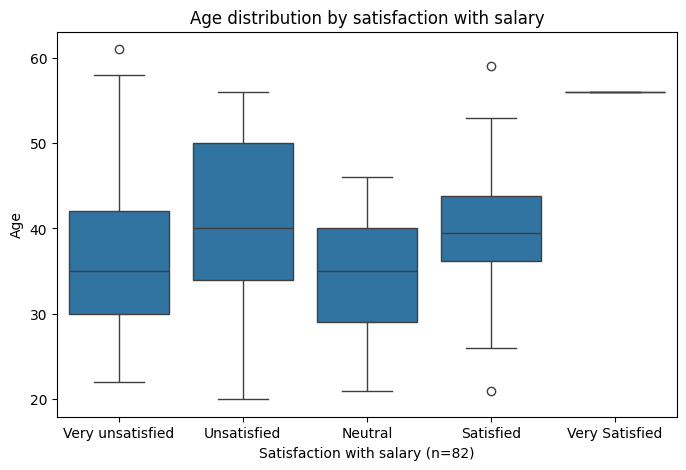

In [1217]:
# Lisätään 1 (erittäin tyytymätön) kuvaajan x akselille, se ei piirry sillä kukaan ei ollut vastannut "Erittäin tyytymätön". Lopuksi järjestellään 1-5.
df_removed['satisfaction with salary'] = (df_removed['satisfaction with salary'].astype('category').cat.set_categories([1, 2, 3, 4, 5], ordered=True))

# Kasvatetaan graafin kokoa, jotta tekstit mahtuvat paremmin.
plt.figure(figsize=(8,5))
# Napataan data muokatusta dataframesta, lyödään x akselille satisfaction with salary, y akselille age ja pisteään järjestykseen.
sns.boxplot(data= df_removed, x='satisfaction with salary', y='age', order=[1,2,3,4,5])

# Lasketaan vastanneiden määrä
total_count = df_removed['satisfaction with salary'].count()

# Korvataan numerot tekstillä havainnollistamiseksi
plt.xticks(ticks=[0,1,2,3,4], labels=[sat_map[i] for i in range(1,6)])

# Annetaan x akselille oikea nimi ja "f" alkuun niin saadaan lisättyä total_count(datasetin alussa tullut kirjoitus virhe). Y akselille annetaan nimi, ja lisätään kuvaajan nimi.
plt.xlabel(f"Satisfaction with salary (n={total_count})")
plt.ylabel("Age")
# Pistetään ; loppuun niin printata ylimääräisiä.
plt.title("Age distribution by satisfaction with salary");


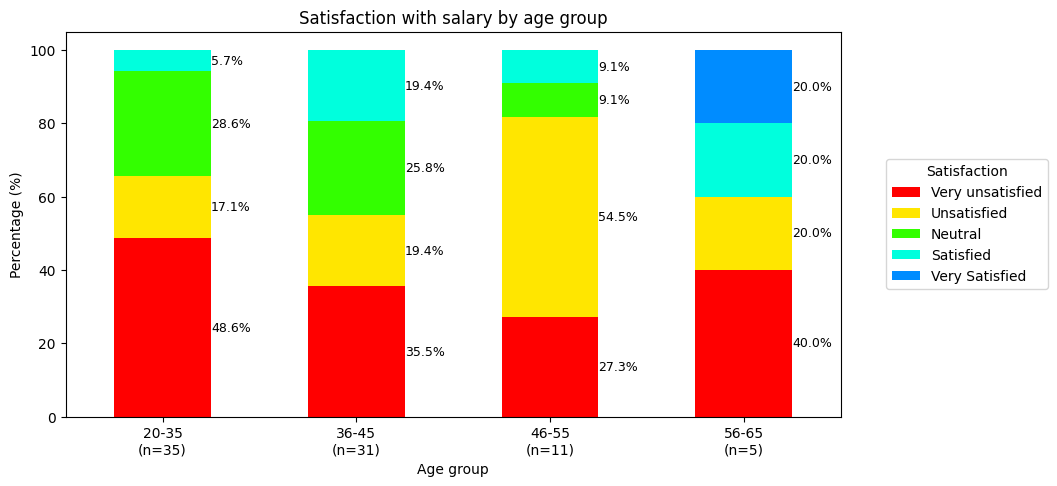

In [1218]:
df_sat_sal_age_plot = df_sat_sal_age_percent
# Lisätään ensimmäinen (0) indexi, koska kerta siellä ei ole dataa niin se putoaa pois, ja ei näy silloin graafissa
df_sat_sal_age_plot = df_sat_sal_age_plot.reindex(columns=[1,2,3,4,5],fill_value=0)
# Alustetaan ikäryhmäkohtainen määrä
count_per_group = df_sat_sal_age['Total']
# Mapataan ikäryhmäkohtainen määrä graafia varten (n= luku)
age_group_labels = [f"{age}\n(n={int(count_per_group[age])})" for age in df_sat_sal_age_percent.index]

# Mapataan värit graafeja varten
colors = ["#FF0000","#FFE600","#33FF00","#00FFDD","#008CFF"]
# Määritellään millainen graafi luodaan, kasataan tässä tapauksessa päällekkäin.
df_sat_sal_age_plot.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
plt.xlabel("Age group")
plt.title("Satisfaction with salary by age group")
plt.xticks(ticks=range(len(df_sat_sal_age_plot.index)), labels=age_group_labels, rotation=0)
plt.legend(title="Satisfaction", labels=[sat_map[i] for i in range(1,6)], bbox_to_anchor=(1.05, 0.5), loc="center left")

# Käydään läpi jokainen ikäryhmä rivi taulukosta
for i, age_group in enumerate(df_sat_sal_age_plot.index):
    # Alustetaan muuttuja, joka seuraa segmentin alarajaa pinotussa palkissa
    bottom = 0
    for col in df_sat_sal_age_plot.columns:
        # Haetaan käsittelyssä olevan segmentin prosentti osuus
        pct = df_sat_sal_age_plot.loc[age_group, col]
        # Lisätään teksti vain jos segmentti on olemassa
        if pct > 0:
            # Lisätään prosentti luku palkin oikealle puolelle, missä x suunta on = i + 0.25 ja y suunta segmentin keskellä on = bottom + pct/2. f"{pct:.1f}%" ottaa prosentin yhden desimaalin tarkkuudella ja lisää % merkin
            #ha='left', va='center' vaakasuuntainen tasaus vasemmalle ja pystysuuntainen keskelle
            plt.gca().text(i + 0.25, bottom + pct/2, f"{pct:.1f}%", ha='left', va='center', fontsize=9)
        # Päivitetään segmentin alaraja seuraava segmenttiä varten
        bottom += pct

##### Chi2

In [1219]:
# Otetaan tutkittavat kentät ct:he (consistency table)
ct = pd.crosstab(age_binned, df_removed['satisfaction with salary'])
# Summataan columni kohtaisesti ja !=0 katsotaan että solussa on dataa, muuten epäonnistuu. Voisi toki vaihtaa 0 -> 0.1 joka ei merkitsisi pahemmin.
ct = ct.loc[:, (ct.sum(axis=0) != 0)]
# Ajetaan chi2 eli "kii toiseen", p arvo, dof (degree of freedom) 
chi2, p, dof, expected = chi2_contingency(ct)
# Tulostetaan tulos
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 27.55, p = 0.006, dof = 12


In [1220]:
# Tehdään yhdistetty mappi
combined_map = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Satisfied'}
# Mapataan yhteen 2 ekaa ja kaksi vikaa saraketta
df_removed['age_sal'] = df_removed['satisfaction with salary'].map(combined_map)

ct = pd.crosstab(age_binned, df_removed['age_sal'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")

Chi2 = 8.77, p = 0.187, dof = 6


Chi2 Testissä p arvoa lähemmin tarkastellen, päätin varmuudeksi yhdistää erittäin tyytymätön + tyytymätön ja erittäin tyytyväinen + tyytyväinen. Testin uudelleen ajettaessa, näyttäisi siltä että ikä ryhmällä ei ole merkittävää riippuvuutta tyytyväisyyteen palkasta.

#### Age & Satisfaction with job tasks

##### Frequency tables

In [1221]:

# Crosstabi iälle ja tyytyväisyydelle
df_sat_job_age = pd.crosstab(age_binned, df_removed['satisfaction with job tasks'], dropna=False)
# Lisätään total countti
df_sat_job_age['Total'] = df_sat_job_age.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_job_age = df_sat_job_age.rename_axis("Age").rename_axis(columns="Satisfaction with job tasks", axis=1)

df_sat_job_age

Satisfaction with job tasks,1,2,3,4,5,Total
Age,,,,,,
20-35,1,6,17,9,2,35
36-45,4,7,8,8,4,31
46-55,0,2,3,6,0,11
56-65,0,0,1,2,2,5


In [1222]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_job_age_percent = df_sat_job_age.div(df_sat_job_age['Total'], axis=0) * 100

df_sat_job_age_percent = df_sat_job_age_percent.round(2)

# Pudotetaan Total sarake
df_sat_job_age_percent = df_sat_job_age_percent.drop(columns='Total')

df_sat_job_age_percent

Satisfaction with job tasks,1,2,3,4,5
Age,,,,,
20-35,2.86,17.14,48.57,25.71,5.71
36-45,12.90,22.58,25.81,25.81,12.90
46-55,0.00,18.18,27.27,54.55,0.00
56-65,0.00,0.00,20.00,40.00,40.00


##### Graphs

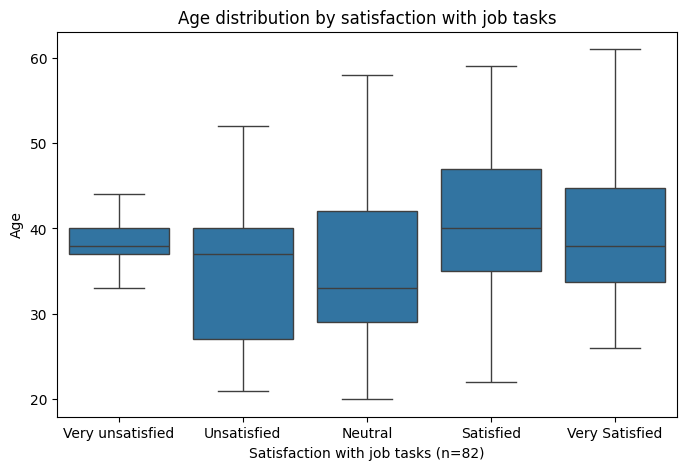

In [1223]:
# Lisätään 1 (erittäin tyytymätön) kuvaajan x akselille, se ei piirry sillä kukaan ei ollut vastannut "Erittäin tyytymätön". Lopuksi järjestellään 1-5.
df_removed['satisfaction with job tasks'] = (df_removed['satisfaction with job tasks'].astype('category').cat.set_categories([1, 2, 3, 4, 5], ordered=True))

# Kasvatetaan graafin kokoa, jotta tekstit mahtuvat paremmin.
plt.figure(figsize=(8,5))
sns.boxplot(data= df_removed, x='satisfaction with job tasks', y='age', order=[1,2,3,4,5])

# Lasketaan vastanneiden määrä
total_count = df_removed['satisfaction with job tasks'].count()

# Korvataan numerot tekstillä havainnollistamiseksi
plt.xticks(ticks=[0,1,2,3,4], labels=[sat_map[i] for i in range(1,6)])

# Annetaan x akselille oikea nimi ja "f" alkuun niin saadaan lisättyä total_count(datasetin alussa tullut kirjoitus virhe). Y akselille annetaan nimi, ja lisätään kuvaajan nimi.
plt.xlabel(f"Satisfaction with job tasks (n={total_count})")
plt.ylabel("Age")
# Pistetään ; loppuun niin printata ylimääräisiä.
plt.title("Age distribution by satisfaction with job tasks");


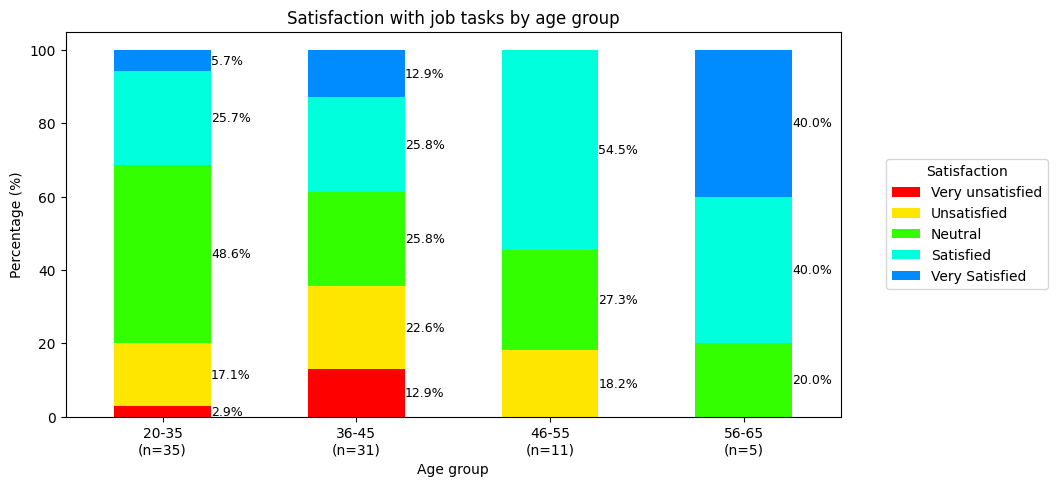

In [1224]:
df_sat_job_age_plot = df_sat_job_age_percent
# Lisätään ensimmäinen (0) indexi, koska kerta siellä ei ole dataa niin se putoaa pois, ja ei näy silloin graafissa
df_sat_job_age_plot = df_sat_job_age_plot.reindex(columns=[1,2,3,4,5], fill_value=0)
# Alustetaan ikäryhmäkohtainen määrä
count_per_group = df_sat_job_age['Total']
# Mapataan ikäryhmäkohtainen määrä graafia varten (n= luku)
age_group_labels = [f"{age}\n(n={int(count_per_group[age])})" for age in df_sat_job_age_percent.index]

# Mapataan värit graafeja varten
colors = ["#FF0000","#FFE600","#33FF00","#00FFDD","#008CFF"]
# Määritellään millainen graafi luodaan, kasataan tässä tapauksessa päällekkäin.
df_sat_job_age_plot.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
plt.xlabel("Age group")
plt.title("Satisfaction with job tasks by age group")
plt.xticks(ticks=range(len(df_sat_job_age_plot.index)), labels=age_group_labels, rotation=0)
plt.legend(title="Satisfaction", labels=[sat_map[i] for i in range(1,6)], bbox_to_anchor=(1.05, 0.5), loc="center left")

# Käydään läpi jokainen ikäryhmä rivi taulukosta
for i, age_group in enumerate(df_sat_job_age_plot.index):
    # Alustetaan muuttuja, joka seuraa segmentin alarajaa pinotussa palkissa
    bottom = 0
    for col in df_sat_job_age_plot.columns:
        # Haetaan käsittelyssä olevan segmentin prosentti osuus
        pct = df_sat_job_age_plot.loc[age_group, col]
        # Lisätään teksti vain jos segmentti on olemassa
        if pct > 0:
            # Lisätään prosentti luku palkin oikealle puolelle, missä x suunta on = i + 0.25 ja y suunta segmentin keskellä on = bottom + pct/2. f"{pct:.1f}%" ottaa prosentin yhden desimaalin tarkkuudella ja lisää % merkin
            #ha='left', va='center' vaakasuuntainen tasaus vasemmalle ja pystysuuntainen keskelle
            plt.gca().text(i + 0.25, bottom + pct/2, f"{pct:.1f}%", ha='left', va='center', fontsize=9)
        # Päivitetään segmentin alaraja seuraava segmenttiä varten
        bottom += pct

##### Chi2

In [1225]:
# Otetaan tutkittavat kentät ct:he (consistency table)
ct = pd.crosstab(age_binned, df_removed['satisfaction with job tasks'])
# Summataan columni kohtaisesti ja !=0 katsotaan että solussa on dataa, muuten epäonnistuu. Voisi toki vaihtaa 0 -> 0.1 joka ei merkitsisi pahemmin.
ct = ct.loc[:, (ct.sum(axis=0) != 0)]
# Ajetaan chi2 eli "kii toiseen", p arvo, dof (degree of freedom) 
chi2, p, dof, expected = chi2_contingency(ct)
# Tulostetaan tulos
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 17.63, p = 0.127, dof = 12


### Comparing Satisfaction with collegues to Sat Variables

#### Comparing Satisfaction with collegues to Satisfaction with management

##### Frequency tables

In [1226]:
# Pudotetaan rivit missä ei ole arvoja ja luodaan kopio niin ei pandas herjaa
df_sat_col_man_drop = df_removed.dropna(subset=['satisfaction with colleques', 'satisfaction with management']).copy()
# Tehdään mappaus
df_sat_col_man_drop['satisfaction with colleques'] = df_sat_col_man_drop['satisfaction with colleques'].map(sat_map)
df_sat_col_man_drop['satisfaction with management'] = df_sat_col_man_drop['satisfaction with management'].map(sat_map)
# Crosstabi iälle ja tyytyväisyydelle
df_sat_col_man = pd.crosstab(df_sat_col_man_drop['satisfaction with colleques'], df_sat_col_man_drop['satisfaction with management'], dropna=False)
# Lisätään total countti
df_sat_col_man['Total'] = df_sat_col_man.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_col_man = df_sat_col_man.rename_axis("Satisfaction with colleagues").rename_axis(columns="Satisfaction with management", axis=1)

df_sat_col_man

Satisfaction with management,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied,Total
Satisfaction with colleagues,,,,,,
Very unsatisfied,0,0,0,0,0,0
Unsatisfied,1,1,1,0,0,3
Neutral,1,5,7,2,1,16
Satisfied,0,9,12,14,0,35
Very Satisfied,5,0,10,7,5,27


In [1227]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_col_man_percent = df_sat_col_man.div(df_sat_col_man['Total'], axis=0) * 100
# Pyöristetään ja korvataan NaN -> 0
df_sat_col_man_percent = df_sat_col_man_percent.round(2).fillna(0)

# Pudotetaan Total sarake
df_sat_col_man_percent = df_sat_col_man_percent.drop(columns='Total')

df_sat_col_man_percent

Satisfaction with management,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
Satisfaction with colleagues,,,,,
Very unsatisfied,0.00,0.00,0.00,0.00,0.00
Unsatisfied,33.33,33.33,33.33,0.00,0.00
Neutral,6.25,31.25,43.75,12.50,6.25
Satisfied,0.00,25.71,34.29,40.00,0.00
Very Satisfied,18.52,0.00,37.04,25.93,18.52


##### Graphs

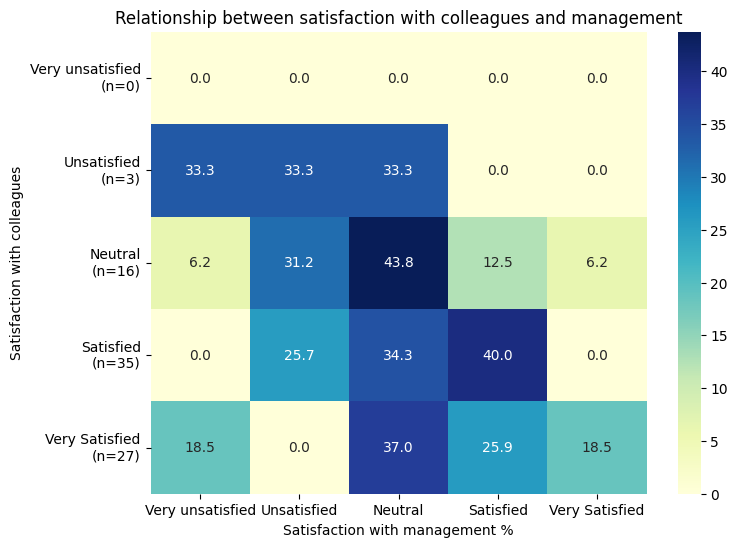

In [1228]:
# Otetaan y akselin kolleega kategoriat(1-5), tehdään näin jotta "Very unsatisfied" ei putoa taulukosta
col_categories = df_sat_col_man_percent.index

# Otetaan vastanneiden määrä
answ_counts = df_sat_col_man_drop['satisfaction with colleques'].value_counts()

# Lisätään vastanneiden määrä
y_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään lämpökartta
plt.figure(figsize=(8,6))
# annot=True printaa prosentti arvon solujen sisään, fmt formatoi yhteen desimaaliin, cmappi antaa värit Yellow green blue
sns.heatmap(df_sat_col_man_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between satisfaction with colleagues and management")
plt.xlabel("Satisfaction with management %")
plt.ylabel("Satisfaction with colleagues")
# Lisätään kuvaajaan y labeleille vastanneiden määrä
plt.yticks(ticks=np.arange(len(y_labels)) + 0.5, labels=y_labels, rotation=0);

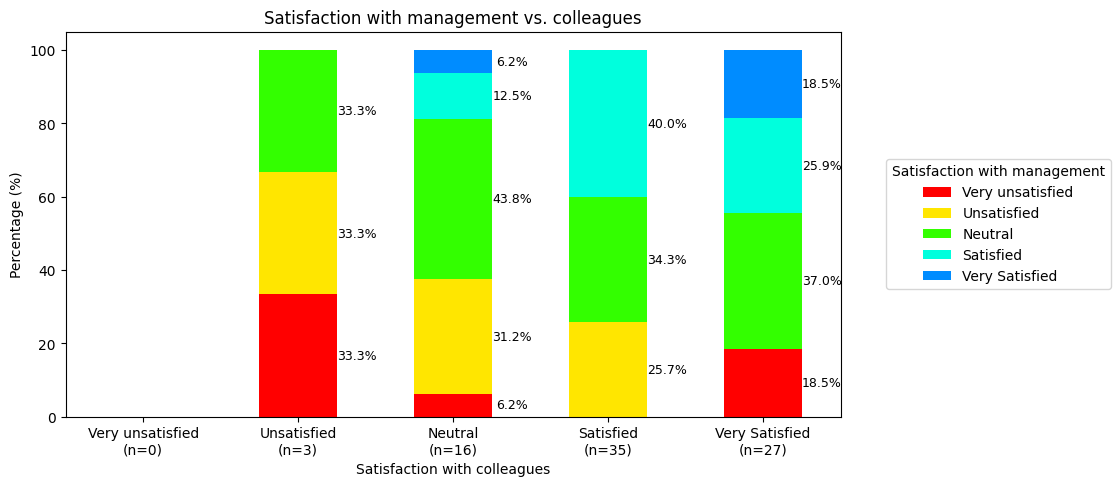

In [1229]:
# Värien mappaus
colors = ["#FF0000", "#FFE600", "#33FF00", "#00FFDD", "#008CFF"]
# otetaan vastanneiden määrä
answ_counts = df_sat_col_man_drop['satisfaction with colleques'].value_counts()

x_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään stacked bar chartti
df_sat_col_man_percent.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
# Laitetaan summa näkyviin graafille
plt.xlabel("Satisfaction with colleagues")
plt.title("Satisfaction with management vs. colleagues")
plt.legend(title="Satisfaction with management", bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=0);

# Lisätään prosentit osioiden viereen
for i, col_val in enumerate(df_sat_col_man_percent.index):
    bottom = 0
    for col in df_sat_col_man_percent.columns:
        pct = df_sat_col_man_percent.loc[col_val, col]
        if pct > 0:
            plt.gca().text(i + 0.38, bottom + pct/2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
        bottom += pct

###### Testi graafi, ei käyttistä. Toimisi mutta en pidä

GPT tuotoksia, ei sillä että en sitä ymmärtäisi, sen hieno säätäminen kestäisi vain liian kauan tarkoitukseensa.

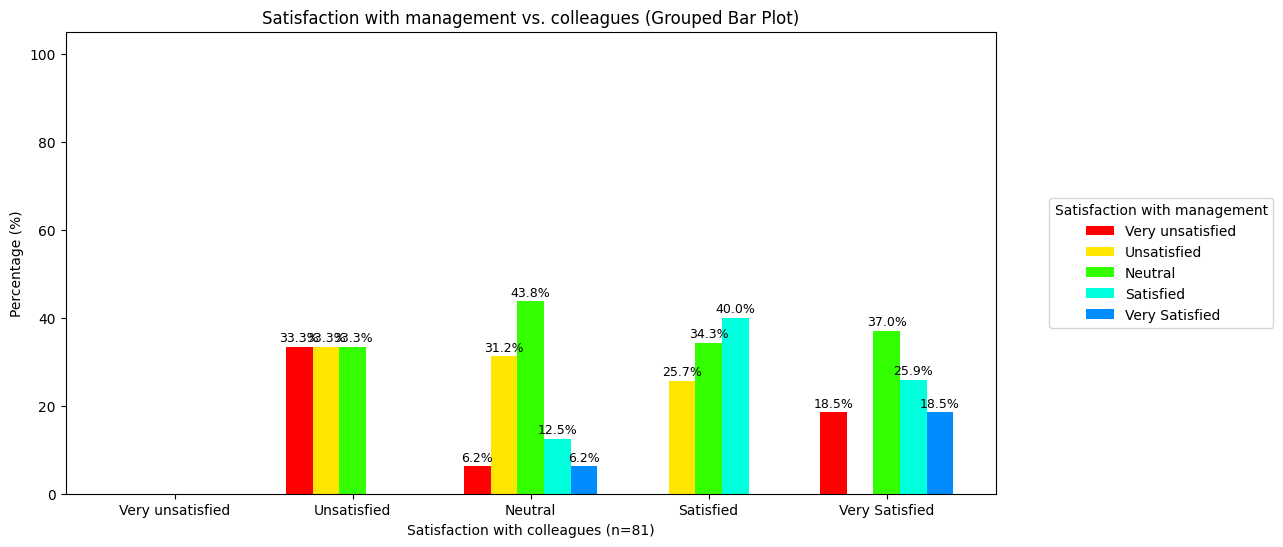

In [1230]:

colors = ["#FF0000", "#FFE600", "#33FF00", "#00FFDD", "#008CFF"]

answ_count = df_sat_col_man_drop.shape[0]

n_rows = df_sat_col_man_percent.shape[0]
n_cols = df_sat_col_man_percent.shape[1]

x = np.arange(n_rows)
width = 0.15

plt.figure(figsize=(12,6))

for i, col in enumerate(df_sat_col_man_percent.columns):
    plt.bar(x + i*width, df_sat_col_man_percent[col], width=width, color=colors[i], label=col)
    
    for j in range(n_rows):
        pct = df_sat_col_man_percent.iloc[j, i]
        if pct > 0:
            plt.text(x[j] + i*width, pct + 0.5, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

plt.xticks(ticks=x + width*(n_cols-1)/2, labels=df_sat_col_man_percent.index)
plt.xlabel(f"Satisfaction with colleagues (n={answ_count})")
plt.ylabel("Percentage (%)")
plt.title("Satisfaction with management vs. colleagues (Grouped Bar Plot)")
plt.legend(title="Satisfaction with management", bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.ylim(0, 105)
plt.show()


##### Chi2

In [1231]:
# Tehdään yhdistetty mappi
combined_map = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Satisfied'}
# Mapataan yhteen 2 ekaa ja kaksi vikaa saraketta
df_removed['colleagues'] = df_removed['satisfaction with colleques'].map(combined_map)
df_removed['management'] = df_removed['satisfaction with management'].map(combined_map)

ct = pd.crosstab(df_removed['colleagues'], df_removed['management'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 6.10, p = 0.192, dof = 4


#### Comparing Satisfaction with collegues to Satisfaction with working enviroment

##### Frequency tables

In [1232]:
# Pudotetaan rivit missä ei ole arvoja ja luodaan kopio niin ei pandas herjaa
df_sat_col_env_drop = df_removed.dropna(subset=['satisfaction with colleques', 'satisfaction with working environment']).copy()
# Tehdään mappaus
df_sat_col_env_drop['satisfaction with colleques'] = df_sat_col_env_drop['satisfaction with colleques'].map(sat_map)
df_sat_col_env_drop['satisfaction with working environment'] = df_sat_col_env_drop['satisfaction with working environment'].map(sat_map)
# Crosstabi iälle ja tyytyväisyydelle
df_sat_col_env = pd.crosstab(df_sat_col_env_drop['satisfaction with colleques'], df_sat_col_env_drop['satisfaction with working environment'], dropna=False)
# Lisätään total countti
df_sat_col_env['Total'] = df_sat_col_env.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_col_env = df_sat_col_env.rename_axis("Satisfaction with colleagues").rename_axis(columns="Satisfaction with working environment", axis=1)

df_sat_col_env

Satisfaction with working environment,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied,Total
Satisfaction with colleagues,,,,,,
Very unsatisfied,0,0,0,0,0,0
Unsatisfied,2,1,0,0,0,3
Neutral,2,4,3,7,0,16
Satisfied,1,2,19,9,4,35
Very Satisfied,4,1,8,7,7,27


In [1233]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_col_env_percent = df_sat_col_env.div(df_sat_col_env['Total'], axis=0) * 100
# Pyöristetään ja korvataan NaN -> 0
df_sat_col_env_percent = df_sat_col_env_percent.round(2).fillna(0)

# Pudotetaan Total sarake
df_sat_col_env_percent = df_sat_col_env_percent.drop(columns='Total')

df_sat_col_env_percent

Satisfaction with working environment,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
Satisfaction with colleagues,,,,,
Very unsatisfied,0.00,0.00,0.00,0.00,0.00
Unsatisfied,66.67,33.33,0.00,0.00,0.00
Neutral,12.50,25.00,18.75,43.75,0.00
Satisfied,2.86,5.71,54.29,25.71,11.43
Very Satisfied,14.81,3.70,29.63,25.93,25.93


##### Graphs

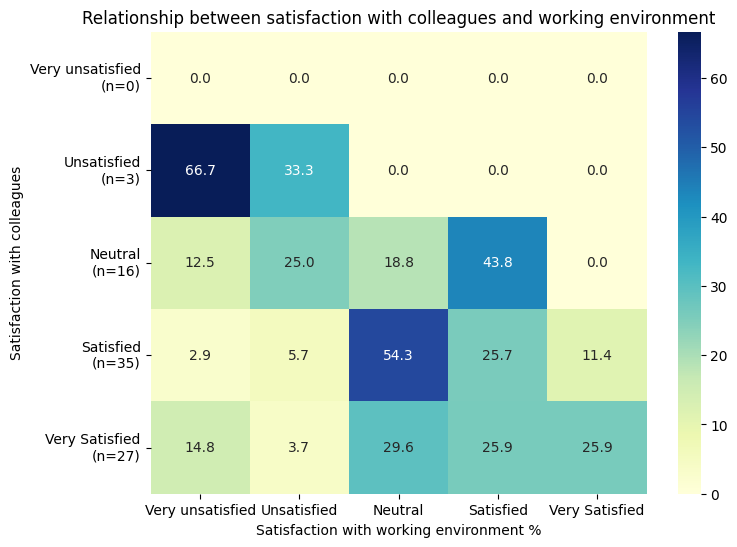

In [1234]:
# Otetaan y akselin kolleega kategoriat(1-5), tehdään näin jotta "Very unsatisfied" ei putoa taulukosta
col_categories = df_sat_col_env_percent.index

# Otetaan vastanneiden määrä
answ_counts = df_sat_col_env_drop['satisfaction with colleques'].value_counts()

# Lisätään vastanneiden määrä
y_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään lämpökartta
plt.figure(figsize=(8,6))
# annot=True printaa prosentti arvon solujen sisään, fmt formatoi yhteen desimaaliin, cmappi antaa värit Yellow green blue
sns.heatmap(df_sat_col_env_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between satisfaction with colleagues and working environment")
plt.xlabel("Satisfaction with working environment %")
plt.ylabel("Satisfaction with colleagues")
# Lisätään kuvaajaan y labeleille vastanneiden määrä
plt.yticks(ticks=np.arange(len(y_labels)) + 0.5, labels=y_labels, rotation=0);

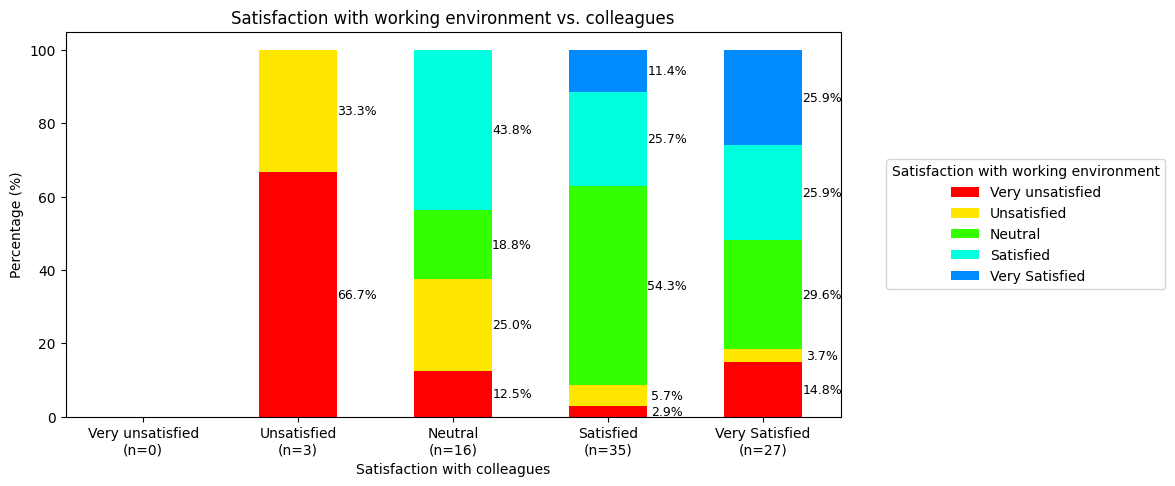

In [1235]:
# Värien mappaus
colors = ["#FF0000", "#FFE600", "#33FF00", "#00FFDD", "#008CFF"]
# otetaan vastanneiden määrä
answ_counts = df_sat_col_env_drop['satisfaction with colleques'].value_counts()

x_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään stacked bar chartti
df_sat_col_env_percent.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
# Laitetaan summa näkyviin graafille
plt.xlabel("Satisfaction with colleagues")
plt.title("Satisfaction with working environment vs. colleagues")
plt.legend(title="Satisfaction with working environment", bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=0);

# Lisätään prosentit osioiden viereen
for i, col_val in enumerate(df_sat_col_env_percent.index):
    bottom = 0
    for col in df_sat_col_env_percent.columns:
        pct = df_sat_col_env_percent.loc[col_val, col]
        if pct > 0:
            plt.gca().text(i + 0.38, bottom + pct/2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
        bottom += pct

##### Chi2

In [1236]:
# Tehdään yhdistetty mappi
combined_map = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Satisfied'}
# Mapataan yhteen 2 ekaa ja kaksi vikaa saraketta
df_removed['colleagues'] = df_removed['satisfaction with colleques'].map(combined_map)
df_removed['work'] = df_removed['satisfaction with working environment'].map(combined_map)

ct = pd.crosstab(df_removed['colleagues'], df_removed['work'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 17.51, p = 0.002, dof = 4


Tässä näyttäisi siltä että tyytyväisyydellä kolleegoihin on vaikutusta työympäristön tyytyväisyyteen.

Sinäänsä siinä on järkeä, epämukavat kolleegat useimmin myös tuottavat epämiellyttävän työympäristön, ja toisin päin.

#### Comparing Satisfaction with collegues to Satisfaction with salary

##### Frequency tables

In [1237]:
# Pudotetaan rivit missä ei ole arvoja ja luodaan kopio niin ei pandas herjaa
df_sat_col_sal_drop = df_removed.dropna(subset=['satisfaction with colleques', 'satisfaction with salary']).copy()
# Tehdään mappaus
df_sat_col_sal_drop['satisfaction with colleques'] = df_sat_col_sal_drop['satisfaction with colleques'].map(sat_map)
df_sat_col_sal_drop['satisfaction with salary'] = df_sat_col_sal_drop['satisfaction with salary'].map(sat_map)
# Crosstabi iälle ja tyytyväisyydelle
df_sat_col_sal = pd.crosstab(df_sat_col_sal_drop['satisfaction with colleques'], df_sat_col_sal_drop['satisfaction with salary'], dropna=False)
# Lisätään total countti
df_sat_col_sal['Total'] = df_sat_col_sal.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_col_sal = df_sat_col_sal.rename_axis("Satisfaction with colleagues").rename_axis(columns="Satisfaction with salary", axis=1)

df_sat_col_sal

Satisfaction with salary,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied,Total
Satisfaction with colleagues,,,,,,
Very unsatisfied,0,0,0,0,0,0
Unsatisfied,3,0,0,0,0,3
Neutral,6,5,5,0,0,16
Satisfied,8,11,10,6,0,35
Very Satisfied,15,3,4,4,1,27


In [1238]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_col_sal_percent = df_sat_col_sal.div(df_sat_col_sal['Total'], axis=0) * 100
# Pyöristetään ja korvataan NaN -> 0
df_sat_col_sal_percent = df_sat_col_sal_percent.round(2).fillna(0)

# Pudotetaan Total sarake
df_sat_col_sal_percent = df_sat_col_sal_percent.drop(columns='Total')

df_sat_col_sal_percent

Satisfaction with salary,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
Satisfaction with colleagues,,,,,
Very unsatisfied,0.00,0.00,0.00,0.00,0.0
Unsatisfied,100.00,0.00,0.00,0.00,0.0
Neutral,37.50,31.25,31.25,0.00,0.0
Satisfied,22.86,31.43,28.57,17.14,0.0
Very Satisfied,55.56,11.11,14.81,14.81,3.7


##### Graphs

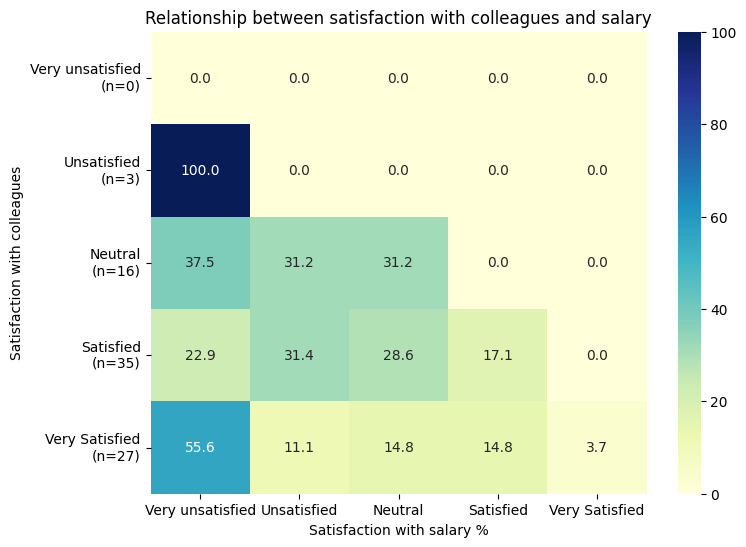

In [1239]:
# Otetaan y akselin kolleega kategoriat(1-5), tehdään näin jotta "Very unsatisfied" ei putoa taulukosta
col_categories = df_sat_col_sal_percent.index

# Otetaan vastanneiden määrä
answ_counts = df_sat_col_sal_drop['satisfaction with colleques'].value_counts()

# Lisätään vastanneiden määrä
y_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään lämpökartta
plt.figure(figsize=(8,6))
# annot=True printaa prosentti arvon solujen sisään, fmt formatoi yhteen desimaaliin, cmappi antaa värit Yellow green blue
sns.heatmap(df_sat_col_sal_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between satisfaction with colleagues and salary")
plt.xlabel("Satisfaction with salary %")
plt.ylabel("Satisfaction with colleagues")
# Lisätään kuvaajaan y labeleille vastanneiden määrä
plt.yticks(ticks=np.arange(len(y_labels)) + 0.5, labels=y_labels, rotation=0);

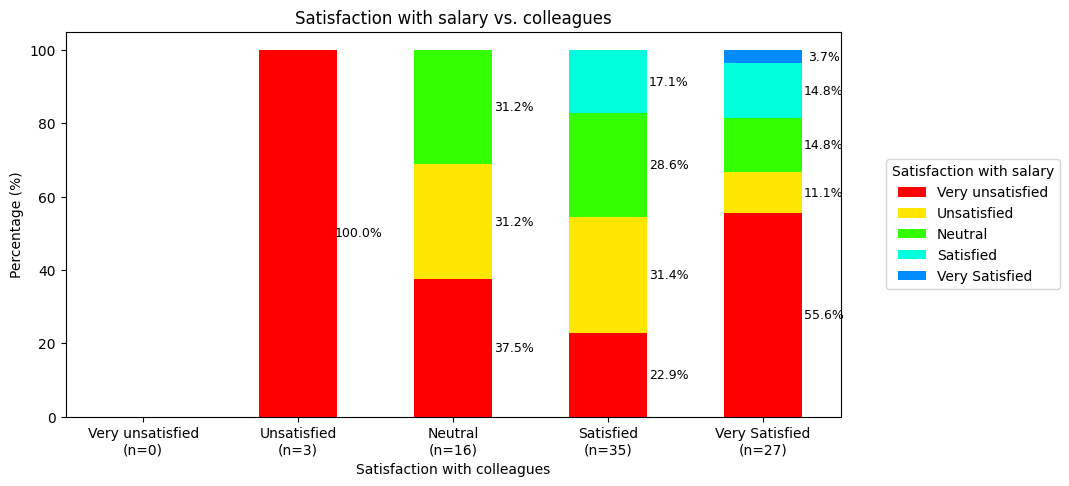

In [1240]:
# Värien mappaus
colors = ["#FF0000", "#FFE600", "#33FF00", "#00FFDD", "#008CFF"]
# otetaan vastanneiden määrä
answ_counts = df_sat_col_sal_drop['satisfaction with colleques'].value_counts()

x_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään stacked bar chartti
df_sat_col_sal_percent.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
# Laitetaan summa näkyviin graafille
plt.xlabel("Satisfaction with colleagues")
plt.title("Satisfaction with salary vs. colleagues")
plt.legend(title="Satisfaction with salary", bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=0);

# Lisätään prosentit osioiden viereen
for i, col_val in enumerate(df_sat_col_sal_percent.index):
    bottom = 0
    for col in df_sat_col_sal_percent.columns:
        pct = df_sat_col_sal_percent.loc[col_val, col]
        if pct > 0:
            plt.gca().text(i + 0.39, bottom + pct/2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
        bottom += pct

##### Chi2

In [1241]:
# Tehdään yhdistetty mappi
combined_map = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Satisfied'}
# Mapataan yhteen 2 ekaa ja kaksi vikaa saraketta
df_removed['colleagues'] = df_removed['satisfaction with colleques'].map(combined_map)
df_removed['salary'] = df_removed['satisfaction with salary'].map(combined_map)

ct = pd.crosstab(df_removed['colleagues'], df_removed['salary'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 5.35, p = 0.253, dof = 4


#### Comparing Satisfaction with collegues to Satisfaction with job tasks

##### Frequency tables

In [1242]:
# Pudotetaan rivit missä ei ole arvoja ja luodaan kopio niin ei pandas herjaa
df_sat_col_job_drop = df_removed.dropna(subset=['satisfaction with colleques', 'satisfaction with job tasks']).copy()
# Tehdään mappaus
df_sat_col_job_drop['satisfaction with colleques'] = df_sat_col_job_drop['satisfaction with colleques'].map(sat_map)
df_sat_col_job_drop['satisfaction with job tasks'] = df_sat_col_job_drop['satisfaction with job tasks'].map(sat_map)
# Crosstabi iälle ja tyytyväisyydelle
df_sat_col_job = pd.crosstab(df_sat_col_job_drop['satisfaction with colleques'], df_sat_col_job_drop['satisfaction with job tasks'], dropna=False)
# Lisätään total countti
df_sat_col_job['Total'] = df_sat_col_job.sum(axis=1)
# Muutetaan isot alkukirjaimet
df_sat_col_job = df_sat_col_job.rename_axis("Satisfaction with colleagues").rename_axis(columns="Satisfaction with job tasks", axis=1)

df_sat_col_job

Satisfaction with job tasks,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied,Total
Satisfaction with colleagues,,,,,,
Very unsatisfied,0,0,0,0,0,0
Unsatisfied,2,1,0,0,0,3
Neutral,1,4,9,2,0,16
Satisfied,0,5,12,16,2,35
Very Satisfied,2,5,8,7,5,27


In [1243]:
# Tehdään prosentti jakauma riveittäin, käytetään .div jakamaan rivin jokainen solu, solujen summalla, tässä tapauksessa eka rivi 35, ja kerrotaan 100 niin saadaan prosentit 
df_sat_col_job_percent = df_sat_col_job.div(df_sat_col_job['Total'], axis=0) * 100
# Pyöristetään ja korvataan NaN -> 0
df_sat_col_job_percent = df_sat_col_job_percent.round(2).fillna(0)

# Pudotetaan Total sarake
df_sat_col_job_percent = df_sat_col_job_percent.drop(columns='Total')

df_sat_col_job_percent

Satisfaction with job tasks,Very unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
Satisfaction with colleagues,,,,,
Very unsatisfied,0.00,0.00,0.00,0.00,0.00
Unsatisfied,66.67,33.33,0.00,0.00,0.00
Neutral,6.25,25.00,56.25,12.50,0.00
Satisfied,0.00,14.29,34.29,45.71,5.71
Very Satisfied,7.41,18.52,29.63,25.93,18.52


##### Graphs

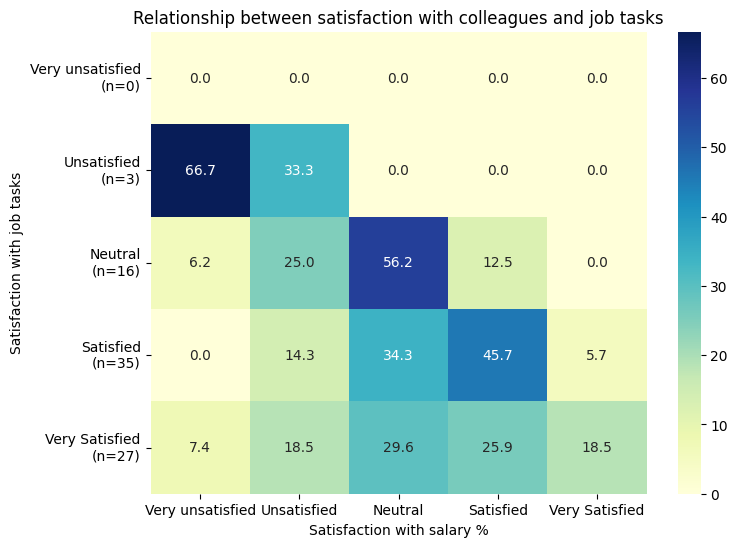

In [1244]:
# Otetaan y akselin kolleega kategoriat(1-5), tehdään näin jotta "Very unsatisfied" ei putoa taulukosta
col_categories = df_sat_col_job_percent.index

# Otetaan vastanneiden määrä
answ_counts = df_sat_col_job_drop['satisfaction with colleques'].value_counts()

# Lisätään vastanneiden määrä
y_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään lämpökartta
plt.figure(figsize=(8,6))
# annot=True printaa prosentti arvon solujen sisään, fmt formatoi yhteen desimaaliin, cmappi antaa värit Yellow green blue
sns.heatmap(df_sat_col_job_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between satisfaction with colleagues and job tasks")
plt.xlabel("Satisfaction with salary %")
plt.ylabel("Satisfaction with job tasks")
# Lisätään kuvaajaan y labeleille vastanneiden määrä
plt.yticks(ticks=np.arange(len(y_labels)) + 0.5, labels=y_labels, rotation=0);

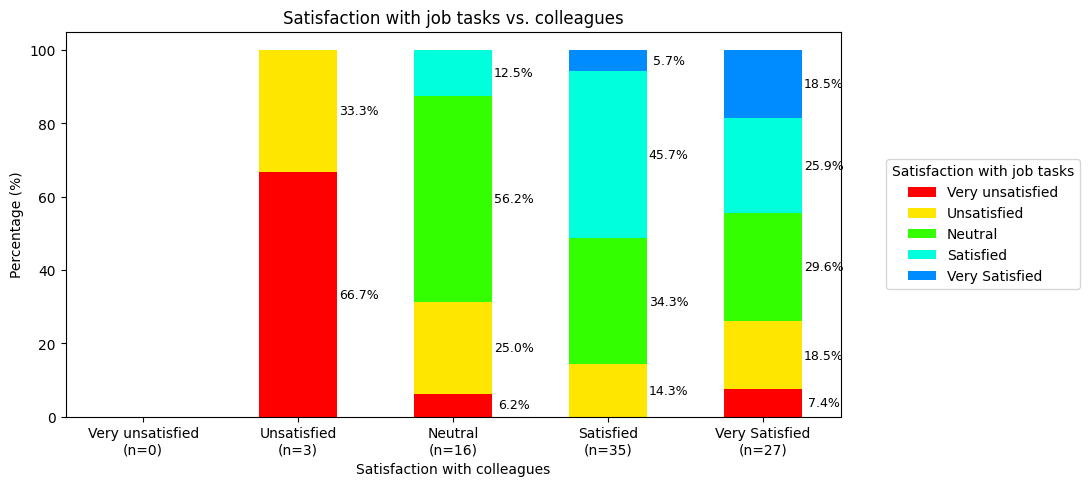

In [1245]:
# Värien mappaus
colors = ["#FF0000", "#FFE600", "#33FF00", "#00FFDD", "#008CFF"]
# otetaan vastanneiden määrä
answ_counts = df_sat_col_job_drop['satisfaction with colleques'].value_counts()

x_labels = [f"{cat}\n(n={answ_counts.get(cat, 0)})" for cat in col_categories]

# Tehdään stacked bar chartti
df_sat_col_job_percent.plot(kind='bar', stacked=True, figsize=(10,5), color=colors)
plt.ylabel("Percentage (%)")
# Laitetaan summa näkyviin graafille
plt.xlabel("Satisfaction with colleagues")
plt.title("Satisfaction with job tasks vs. colleagues")
plt.legend(title="Satisfaction with job tasks", bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=0);

# Lisätään prosentit osioiden viereen
for i, col_val in enumerate(df_sat_col_job_percent.index):
    bottom = 0
    for col in df_sat_col_job_percent.columns:
        pct = df_sat_col_job_percent.loc[col_val, col]
        if pct > 0:
            plt.gca().text(i + 0.39, bottom + pct/2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
        bottom += pct

##### Chi2

In [1246]:
# Tehdään yhdistetty mappi
combined_map = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Satisfied'}
# Mapataan yhteen 2 ekaa ja kaksi vikaa saraketta
df_removed['colleagues'] = df_removed['satisfaction with colleques'].map(combined_map)
df_removed['job'] = df_removed['satisfaction with job tasks'].map(combined_map)

ct = pd.crosstab(df_removed['colleagues'], df_removed['job'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p = {p:.3f}, dof = {dof}")


Chi2 = 16.42, p = 0.003, dof = 4


Näyttäisi siltä että kolleegoilla on myös vaikutusta tyytyväisyyteen työtehtävissä